In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Loading the Data set:

In [3]:
train=pd.read_csv('train.csv')

In [4]:
test = pd.read_csv('test.csv')

In [5]:
train.head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    127         120       RL          NaN     4928   Pave   NaN      IR1   
1    889          20       RL         95.0    15865   Pave   NaN      IR1   
2    793          60       RL         92.0     9920   Pave   NaN      IR1   
3    110          20       RL        105.0    11751   Pave   NaN      IR1   
4    422          20       RL          NaN    16635   Pave   NaN      IR1   
5   1197          60       RL         58.0    14054   Pave   NaN      IR1   
6    561          20       RL          NaN    11341   Pave   NaN      IR1   
7   1041          20       RL         88.0    13125   Pave   NaN      Reg   
8    503          20       RL         70.0     9170   Pave   NaN      Reg   
9    576          50       RL         80.0     8480   Pave   NaN      Reg   
10   449          50       RM         50.0     8600   Pave   NaN      Reg   
11   833          60       RL         44.0     9548   Pave   NaN      IR1   
12   277          20       RL        129.0     9196   Pave   NaN      IR1   
13    84          20       RL         80.0     8892   Pave   NaN      IR1   
14   888          50       RL         59.0    16466   Pave   NaN      IR1   
15  1013          70       RL         55.0    10592   Pave   NaN      Reg   
16  1154          30       RM          NaN     5890   Pave   NaN      Reg   
17   728          20       RL         64.0     7314   Pave   NaN      Reg   
18   270          20       RL          NaN     7917   Pave   NaN      IR1   
19  1105         160       RM         24.0     2016   Pave   NaN      Reg   
20   259          60       RL         80.0    12435   Pave   NaN      Reg   
21  1407          85       RL         70.0     8445   Pave   NaN      Reg   
22  1459          20       RL         68.0     9717   Pave   NaN      Reg   
23   997          20       RL          NaN    10659   Pave   NaN      IR1   
24  1094          20       RL         71.0     9230   Pave   NaN      Reg   
25   114          20       RL          NaN    21000   Pave   NaN      Reg   
26  1384          30       RL          NaN    25339   Pave   NaN      Reg   
27   379          20       RL         88.0    11394   Pave   NaN      Reg   
28   556          45       RM         58.0     6380   Pave   NaN      Reg   
29   464          70       RL         74.0    11988   Pave   NaN      IR1   
30    46         120       RL         61.0     7658   Pave   NaN      Reg   
31   426          60       RM         60.0     3378   Pave  Grvl      Reg   
32  1231          90       RL          NaN    18890   Pave   NaN      IR1   
33   171          50       RM          NaN    12358   Pave   NaN      IR1   
34   869          60       RL          NaN    14762   Pave   NaN      IR2   
35   151          20       RL        120.0    10356   Pave   NaN      Reg   
36   859          20       RL         80.0    10400   Pave   NaN      Reg   
37   176          20       RL         84.0    12615   Pave   NaN      Reg   
38   361          85       RL          NaN     7540   Pave   NaN      IR1   
39   590          40       RM         50.0     9100   Pave   NaN      Reg   
40   172          20       RL        141.0    31770   Pave   NaN      IR1   
41   527          20       RL         70.0    13300   Pave   NaN      Reg   
42  1365         160       FV         30.0     3180   Pave  Pave      Reg   
43   146         160       RM         24.0     2522   Pave   NaN      Reg   
44  1006          80       RL         65.0     8385   Pave   NaN      Reg   
45   275          20       RL         76.0     8314   Pave   NaN      Reg   
46   380          60       RL         60.0     8123   Pave   NaN      IR1   
47  1309          20       RM        100.0    12000   Pave   NaN      Reg   
48   534          20       RL         50.0     5000   Pave   NaN      Reg   
49   494          20       RL         70.0     7931   Pave   NaN      Reg   

   LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0 

In [6]:
train.shape

(1168, 81)

In [7]:
test.head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    337          20       RL         86.0    14157   Pave   NaN      IR1   
1   1018         120       RL          NaN     5814   Pave   NaN      IR1   
2    929          20       RL          NaN    11838   Pave   NaN      Reg   
3   1148          70       RL         75.0    12000   Pave   NaN      Reg   
4   1227          60       RL         86.0    14598   Pave   NaN      IR1   
5    650         180       RM         21.0     1936   Pave   NaN      Reg   
6   1453         180       RM         35.0     3675   Pave   NaN      Reg   
7    152          20       RL        107.0    13891   Pave   NaN      Reg   
8    427          80       RL          NaN    12800   Pave   NaN      Reg   
9    776         120       RM         32.0     4500   Pave   NaN      Reg   
10    30          30       RM         60.0     6324   Pave   NaN      IR1   
11  1425          20       RL          NaN     9503   Pave   NaN      Reg   
12   423          20       RL        100.0    21750   Pave   NaN      Reg   
13  1185          20       RL         50.0    35133   Grvl   NaN      Reg   
14   775          20       RL        110.0    14226   Pave   NaN      Reg   
15   391          50       RL         50.0     8405   Pave  Grvl      Reg   
16  1408          20       RL          NaN     8780   Pave   NaN      IR1   
17   513          20       RL         70.0     9100   Pave   NaN      Reg   
18  1266         160       FV         35.0     3735   Pave   NaN      Reg   
19   173         160       RL         44.0     5306   Pave   NaN      IR1   
20  1150          70       RM         50.0     9000   Pave   NaN      Reg   
21   797          20       RL         71.0     8197   Pave   NaN      Reg   
22   137          20       RL          NaN    10355   Pave   NaN      IR1   
23   706         190       RM         70.0     5600   Pave   NaN      Reg   
24  1377          30       RL         52.0     6292   Pave   NaN      Reg   
25  1177          20       RL         37.0     6951   Pave   NaN      IR1   
26  1456          60       RL         62.0     7917   Pave   NaN      Reg   
27   369          20       RL         78.0     7800   Pave   NaN      Reg   
28  1421          60       RL         90.0    11700   Pave   NaN      Reg   
29   999          30       RM         60.0     9786   Pave   NaN      Reg   
30  1217          90       RM         68.0     8930   Pave   NaN      Reg   
31   937          20       RL         67.0    10083   Pave   NaN      Reg   
32   769          20       RL         70.0     9100   Pave   NaN      Reg   
33   831          20       RL         80.0    11900   Pave   NaN      IR1   
34   678          30       RL         52.0     9022   Pave   NaN      Reg   
35   574          80       RL         76.0     9967   Pave   NaN      IR1   
36   921          60       RL         70.0     8462   Pave   NaN      IR1   
37  1292         160       RM         21.0     1680   Pave   NaN      Reg   
38  1277          60       RL          NaN    12936   Pave   NaN      IR1   
39   676         160       RL         24.0     2289   Pave   NaN      Reg   
40   108          20       RM         50.0     6000   Pave   NaN      Reg   
41   424          60       RL         80.0     9200   Pave   NaN      Reg   
42   823          60       RL          NaN    12394   Pave   NaN      IR1   
43  1455          20       FV         62.0     7500   Pave  Pave      Reg   
44   377          85       RL         57.0     8846   Pave   NaN      IR1   
45  1256          50       RM         52.0     6240   Pave   NaN      Reg   
46  1120          20       RL         70.0     7560   Pave   NaN      Reg   
47   265          30       RM         30.0     5232   Pave  Grvl      IR3   
48  1158         120       RL         34.0     5001   Pave   NaN      IR1   
49   725          20       RL         86.0    13286   Pave   NaN      IR1   

   LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  

In [8]:
test.shape

(292, 80)

## Description of the DATASET:


#### Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company. A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know: • Which variables are important to predict the price of variable? • How do these variables describe the price of the house?

#### Business Goal:

To model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

`Data contains 1460 entries each having 81 variables.`

- MSSubClass: Identifies the type of dwelling involved in the sale.

- MSZoning: Identifies the general zoning classification of the sale.

- LotFrontage: Linear feet of street connected to property

- LotArea: Lot size in square feet

- Street: Type of road access to property

- Alley: Type of alley access to property

- LotShape: General shape of property

- LandContour: Flatness of the property

- Utilities: Type of utilities available

- LotConfig: Lot configuration

- LandSlope: Slope of property

- Neighborhood: Physical locations within Ames city limits

- Condition1: Proximity to various conditions

- Condition2: Proximity to various conditions (if more than one is present)

- BldgType: Type of dwelling

- HouseStyle: Style of dwelling

- OverallQual: Rates the overall material and finish of the house

- OverallCond: Rates the overall condition of the house

- YearBuilt: Original construction date

- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

- RoofStyle: Type of roof

- RoofMatl: Roof material

- Exterior1st: Exterior covering on house

- Exterior2nd: Exterior covering on house (if more than one material)

- MasVnrType: Masonry veneer type

- MasVnrArea: Masonry veneer area in square feet

- ExterQual: Evaluates the quality of the material on the exterior

- ExterCond: Evaluates the present condition of the material on the exterior

- Foundation: Type of foundation

- BsmtQual: Evaluates the height of the basement

- BsmtCond: Evaluates the general condition of the basement

- BsmtExposure: Refers to walkout or garden level walls

- BsmtFinType1: Rating of basement finished area

- BsmtFinSF1: Type 1 finished square feet

- BsmtFinType2: Rating of basement finished area (if multiple types)

- BsmtFinSF2: Type 2 finished square feet

- BsmtUnfSF: Unfinished square feet of basement area

- TotalBsmtSF: Total square feet of basement area

- Heating: Type of heating

- HeatingQC: Heating quality and condition

- CentralAir: Central air conditioning

- Electrical: Electrical system

- 1stFlrSF: First Floor square feet

- 2ndFlrSF: Second floor square feet

- LowQualFinSF: Low quality finished square feet (all floors)

- GrLivArea: Above grade (ground) living area square feet

- BsmtFullBath: Basement full bathrooms

- BsmtHalfBath: Basement half bathrooms

- FullBath: Full bathrooms above grade

- HalfBath: Half baths above grade

- Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

- Kitchen: Kitchens above grade

- KitchenQual: Kitchen quality

- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

- Functional: Home functionality (Assume typical unless deductions are warranted)

- Fireplaces: Number of fireplaces

- FireplaceQu: Fireplace quality

- GarageType: Garage location

- GarageYrBlt: Year garage was built

- GarageFinish: Interior finish of the garage

- GarageCars: Size of garage in car capacity

- GarageArea: Size of garage in square feet

- GarageQual: Garage quality

- GarageCond: Garage condition

- PavedDrive: Paved driveway

- WoodDeckSF: Wood deck area in square feet

- OpenPorchSF: Open porch area in square feet

- EnclosedPorch: Enclosed porch area in square feet

- 3SsnPorch: Three season porch area in square feet

- ScreenPorch: Screen porch area in square feet

- PoolArea: Pool area in square feet

- PoolQC: Pool quality

- Fence: Fence quality

- MiscFeature: Miscellaneous feature not covered in other categories

- MiscVal: Value of miscellaneous feature

- MoSold: Month Sold (MM)

- YrSold: Year Sold (YYYY)

- SaleType: Type of sale

- SaleCondition: Condition of sale

`Target Column:`

- SalePrice

##### Checking for null values in the Train Data set:


In [9]:
train[train.columns[train.isnull().any()]]

LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
0             NaN   NaN       None         0.0       Gd       TA           No   
1            95.0   NaN       None         0.0       TA       Gd           Gd   
2            92.0   NaN       None         0.0       Gd       TA           Av   
3           105.0   NaN    BrkFace       480.0       Gd       TA           No   
4             NaN   NaN      Stone       126.0       Gd       TA           No   
...           ...   ...        ...         ...      ...      ...          ...   
1163          NaN   NaN    BrkFace        31.0       TA       TA           No   
1164         67.0   NaN       None         0.0      NaN      NaN          NaN   
1165         24.0   NaN       None         0.0       Gd       TA           No   
1166         50.0  Pave       None         0.0       TA       TA           No   
1167          NaN   NaN       None         0.0       Gd       TA           No   

     BsmtFinType1 BsmtFinType2 FireplaceQu GarageType  GarageYrBlt  \
0             ALQ          Unf          TA     Attchd       1977.0   
1             ALQ          Rec          TA     Attchd       1970.0   
2             GLQ          Unf          TA     Attchd       1997.0   
3             BLQ          Unf          TA     Attchd       1977.0   
4             ALQ          Unf          TA     Attchd       1977.0   
...           ...          ...         ...        ...          ...   
1163          BLQ          Unf         NaN     Detchd       1970.0   
1164          NaN          NaN         NaN     Detchd       2002.0   
1165          ALQ          Unf          TA     Attchd       1976.0   
1166          Unf          Unf         NaN     Detchd       1920.0   
1167          GLQ          Unf          Gd     Attchd       2002.0   

     GarageFinish GarageQual GarageCond PoolQC  Fence MiscFeature  
0             RFn         TA         TA    NaN    NaN         NaN  
1             Unf         TA         TA    NaN    NaN         NaN  
2             Unf         TA         TA    NaN    NaN         NaN  
3             RFn         TA         TA    NaN  MnPrv         NaN  
4             Fin         TA         TA    NaN    NaN         NaN  
...           ...        ...        ...    ...    ...         ...  
1163          Unf         TA         TA    NaN  MnPrv         NaN  
1164          Fin         TA         TA    NaN  MnPrv         NaN  
1165          Unf         TA         TA    NaN    NaN         NaN  
1166          Unf         TA         Fa    NaN  MnPrv         NaN  
1167          Fin         TA         TA    NaN    NaN         NaN  

[1168 rows x 18 columns]

Train DATASET has 18 columns with null values.

In [10]:
test[test.columns[test.isnull().any()]]

LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
0           86.0   NaN      Stone       200.0       Ex       TA           Gd   
1            NaN   NaN       None         0.0       Gd       TA           Av   
2            NaN   NaN       None         0.0       Gd       TA           Av   
3           75.0   NaN       None         0.0       TA       TA           No   
4           86.0   NaN      Stone        74.0       Gd       TA           Mn   
..           ...   ...        ...         ...      ...      ...          ...   
287         78.0   NaN      Stone       468.0       Gd       TA           No   
288         57.0   NaN       None         0.0       Gd       TA           No   
289          NaN   NaN    BrkFace       180.0       TA       TA           No   
290         50.0   NaN       None         0.0       TA       TA           No   
291         21.0   NaN    BrkFace       408.0       TA       Fa           No   

    BsmtFinType1 BsmtFinType2 Electrical FireplaceQu GarageType  GarageYrBlt  \
0            GLQ          Unf      SBrkr          Gd     Attchd       2005.0   
1            GLQ          Unf      SBrkr          Ex     Attchd       1984.0   
2            Unf          Unf      SBrkr          TA     Attchd       2001.0   
3            Rec          Unf      SBrkr          Gd     Attchd       1941.0   
4            Unf          Unf      SBrkr          Gd    BuiltIn       2007.0   
..           ...          ...        ...         ...        ...          ...   
287          GLQ          Unf      SBrkr          Gd     Attchd       2007.0   
288          GLQ          Unf      SBrkr         NaN     Detchd       1996.0   
289          ALQ          Unf      SBrkr          TA     Attchd       1970.0   
290          ALQ          Unf      SBrkr          Gd     Detchd       1950.0   
291          BLQ          Unf      SBrkr         NaN     Detchd       1973.0   

    GarageFinish GarageQual GarageCond  PoolQC Fence MiscFeature  
0            Fin         TA         TA     NaN   NaN         NaN  
1            RFn         TA         TA     NaN   NaN         NaN  
2            RFn         TA         TA     NaN   NaN         NaN  
3            Unf         TA         TA     NaN   NaN         NaN  
4            Fin         TA         TA     NaN   NaN         NaN  
..           ...        ...        ...     ...   ...         ...  
287          RFn         TA         TA     NaN   NaN         NaN  
288          Unf         TA         TA     NaN   NaN         NaN  
289          Fin         TA         TA     NaN   NaN        Shed  
290          Unf         TA         TA     NaN   NaN         NaN  
291          Unf         TA         TA     NaN   NaN         NaN  

[292 rows x 19 columns]

Test DATASET has 19 columns with null values.

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

#### Droping Columns  "Alley", "PoolQC", "MiscFeature", "FireplaceQu", "Fence" as they have high null value data in both DATASET.

In [13]:
train.drop(columns=['Alley','PoolQC','MiscFeature','FireplaceQu','Fence'],inplace=True)

In [14]:
train.shape

(1168, 76)

In [15]:
test.drop(columns=['Alley','PoolQC','MiscFeature','FireplaceQu','Fence'],inplace=True)

In [16]:
test.shape

(292, 75)

#### Dropping the ID columns from test and train datasets, since it does't contribute to building a good model for predicting the target variable values.

In [17]:
train.drop(columns=['Id'],inplace=True)

In [18]:
test.drop(columns=['Id'],inplace=True)

In [19]:
train.nunique()

MSSubClass        15
MSZoning           5
LotFrontage      106
LotArea          892
Street             2
                ... 
MoSold            12
YrSold             5
SaleType           9
SaleCondition      6
SalePrice        581
Length: 75, dtype: int64

In [20]:
train.dtypes[train.dtypes == 'object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [21]:
train.dtypes[train.dtypes != 'object']

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [22]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL          NaN     4928   Pave      IR1         Lvl   
1          20       RL         95.0    15865   Pave      IR1         Lvl   
2          60       RL         92.0     9920   Pave      IR1         Lvl   
3          20       RL        105.0    11751   Pave      IR1         Lvl   
4          20       RL          NaN    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub    Inside       Mod  ...             0         0         224   
2    AllPub   CulDSac       Gtl  ...             0         0           0   
3    AllPub    Inside       Gtl  ...             0         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2007        WD         Normal    128000  
1        0       0      10    2007        WD         Normal    268000  
2        0       0       6    2007        WD         Normal    269790  
3        0       0       1    2010       COD         Normal    190000  
4        0       0       6    2009        WD         Normal    215000  

[5 rows x 75 columns]

#### Finding the null value percentage in each of the columns in test dataset.

In [23]:
for c in train[train.columns[train.isnull().any()]]:
    perct = train[c].isnull().sum()/1168*100
    print(f"null value % in {c} is: {perct}")

null value % in LotFrontage is: 18.32191780821918
null value % in MasVnrType is: 0.5993150684931506
null value % in MasVnrArea is: 0.5993150684931506
null value % in BsmtQual is: 2.5684931506849313
null value % in BsmtCond is: 2.5684931506849313
null value % in BsmtExposure is: 2.654109589041096
null value % in BsmtFinType1 is: 2.5684931506849313
null value % in BsmtFinType2 is: 2.654109589041096
null value % in GarageType is: 5.47945205479452
null value % in GarageYrBlt is: 5.47945205479452
null value % in GarageFinish is: 5.47945205479452
null value % in GarageQual is: 5.47945205479452
null value % in GarageCond is: 5.47945205479452


In [24]:
for c in test[test.columns[test.isnull().any()]]:
    perct = test[c].isnull().sum()/292*100
    print(f"null value % in {c} is: {perct}")

null value % in LotFrontage is: 15.41095890410959
null value % in MasVnrType is: 0.3424657534246575
null value % in MasVnrArea is: 0.3424657534246575
null value % in BsmtQual is: 2.3972602739726026
null value % in BsmtCond is: 2.3972602739726026
null value % in BsmtExposure is: 2.3972602739726026
null value % in BsmtFinType1 is: 2.3972602739726026
null value % in BsmtFinType2 is: 2.3972602739726026
null value % in Electrical is: 0.3424657534246575
null value % in GarageType is: 5.821917808219178
null value % in GarageYrBlt is: 5.821917808219178
null value % in GarageFinish is: 5.821917808219178
null value % in GarageQual is: 5.821917808219178
null value % in GarageCond is: 5.821917808219178


In [25]:
train[train.columns[train.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   954 non-null    float64
 1   MasVnrType    1161 non-null   object 
 2   MasVnrArea    1161 non-null   float64
 3   BsmtQual      1138 non-null   object 
 4   BsmtCond      1138 non-null   object 
 5   BsmtExposure  1137 non-null   object 
 6   BsmtFinType1  1138 non-null   object 
 7   BsmtFinType2  1137 non-null   object 
 8   GarageType    1104 non-null   object 
 9   GarageYrBlt   1104 non-null   float64
 10  GarageFinish  1104 non-null   object 
 11  GarageQual    1104 non-null   object 
 12  GarageCond    1104 non-null   object 
dtypes: float64(3), object(10)
memory usage: 118.8+ KB


In [26]:
test[test.columns[test.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   247 non-null    float64
 1   MasVnrType    291 non-null    object 
 2   MasVnrArea    291 non-null    float64
 3   BsmtQual      285 non-null    object 
 4   BsmtCond      285 non-null    object 
 5   BsmtExposure  285 non-null    object 
 6   BsmtFinType1  285 non-null    object 
 7   BsmtFinType2  285 non-null    object 
 8   Electrical    291 non-null    object 
 9   GarageType    275 non-null    object 
 10  GarageYrBlt   275 non-null    float64
 11  GarageFinish  275 non-null    object 
 12  GarageQual    275 non-null    object 
 13  GarageCond    275 non-null    object 
dtypes: float64(3), object(11)
memory usage: 32.1+ KB


#### Most of the null Value data in both DATASET are "Object" type.

In [27]:
#checking the % share of most frequently occuring value.

(train['MasVnrArea']==0.0).sum()/train['MasVnrArea'].count()*100

59.60378983634798

In [28]:
#### Using KNN Imputation technique for imputing missing data in LotFrontage .

In [29]:
from sklearn.impute import KNNImputer

In [30]:
imp = KNNImputer(n_neighbors=2)

In [31]:
train[['LotFrontage']] = imp.fit_transform(train[['LotFrontage']])

In [32]:
train[['LotFrontage']].isnull().sum()

LotFrontage    0
dtype: int64

 No null values in LotFrontage.

In [33]:
#checking the % share of most frequently occuring value.

(train['MasVnrArea']==0.0).sum()/train['MasVnrArea'].count()*100 

59.60378983634798

#### Imputing The mose frequently occuring values to NaN values in each of the columns.

In [34]:
from sklearn.impute import SimpleImputer

In [35]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [36]:
si = si.fit(train[['MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']])

In [37]:
train[['MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']] = si.transform(train[['MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']])

In [38]:
train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

All null values have been taken care of.

#### Using KNN Imputation technique for imputing missing data in LotFrontage in test DATASET .

In [39]:
imp = KNNImputer(n_neighbors=2)

In [40]:
test[['LotFrontage']] = imp.fit_transform(test[['LotFrontage']])

In [41]:
test[['LotFrontage']].isnull().sum()

LotFrontage    0
dtype: int64

#### Imputing The mose frequently occuring values to NaN values in each of the columns in test DATASET.

In [42]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [43]:
si = si.fit(test[['MasVnrType','Electrical','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']])

In [44]:
test[['MasVnrType','Electrical','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']] = si.transform(test[['MasVnrType','Electrical','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']])

In [45]:
test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 74, dtype: int64

All null valus have been removed.

## Performing Basic EDA on the DataSet.

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

In [47]:
train.dtypes[train.dtypes== 'object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [48]:
train.dtypes[train.dtypes!='object']

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [49]:
train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.988470   10484.749144     6.104452     5.595890   
std      41.940650    22.437056    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.988470    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000  ...   
mean   1970.930651   1984.758562   101.696918   444.726027    46.647260  ...   
std      30.145255     20.785185   182.218483   462.664785   163.520016  ...   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000  ...   
50%    1972.000000   1993.000000     0.000000   385.500000     0.000000  ...   
75%    2000.000000   2004.000000   160.000000   714.500000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

#### `Above values shows;-`

- Huge diffrence B/W 'max' and '75%' in many columns shows presence of Outliers.
- Higher 'std' compared to  'mean' in many columns shows presence of Skewness.

### Interpreting relationship B/W Independent and Dependent Variables.


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

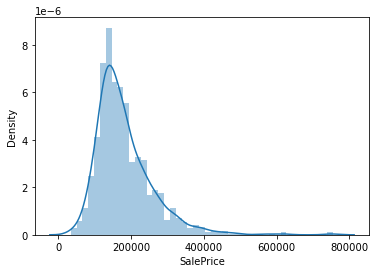

In [50]:
# Analyzing Target column
sea.distplot(train.SalePrice)

##### From the graph above it is observed that the Price data forms a continuous distribution with mean of 181477.00 and tails off from 400000 mark.

In [51]:
train.SalePrice.skew()

1.953877705368286

<AxesSubplot:xlabel='SalePrice'>

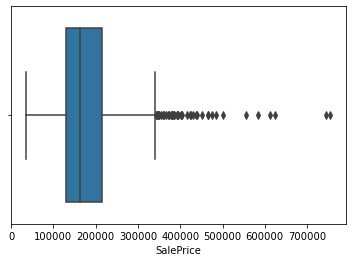

In [52]:
sea.boxplot(train.SalePrice)

Graph shows presence of Outliers.

##### Ploting and analysing Feature columns.

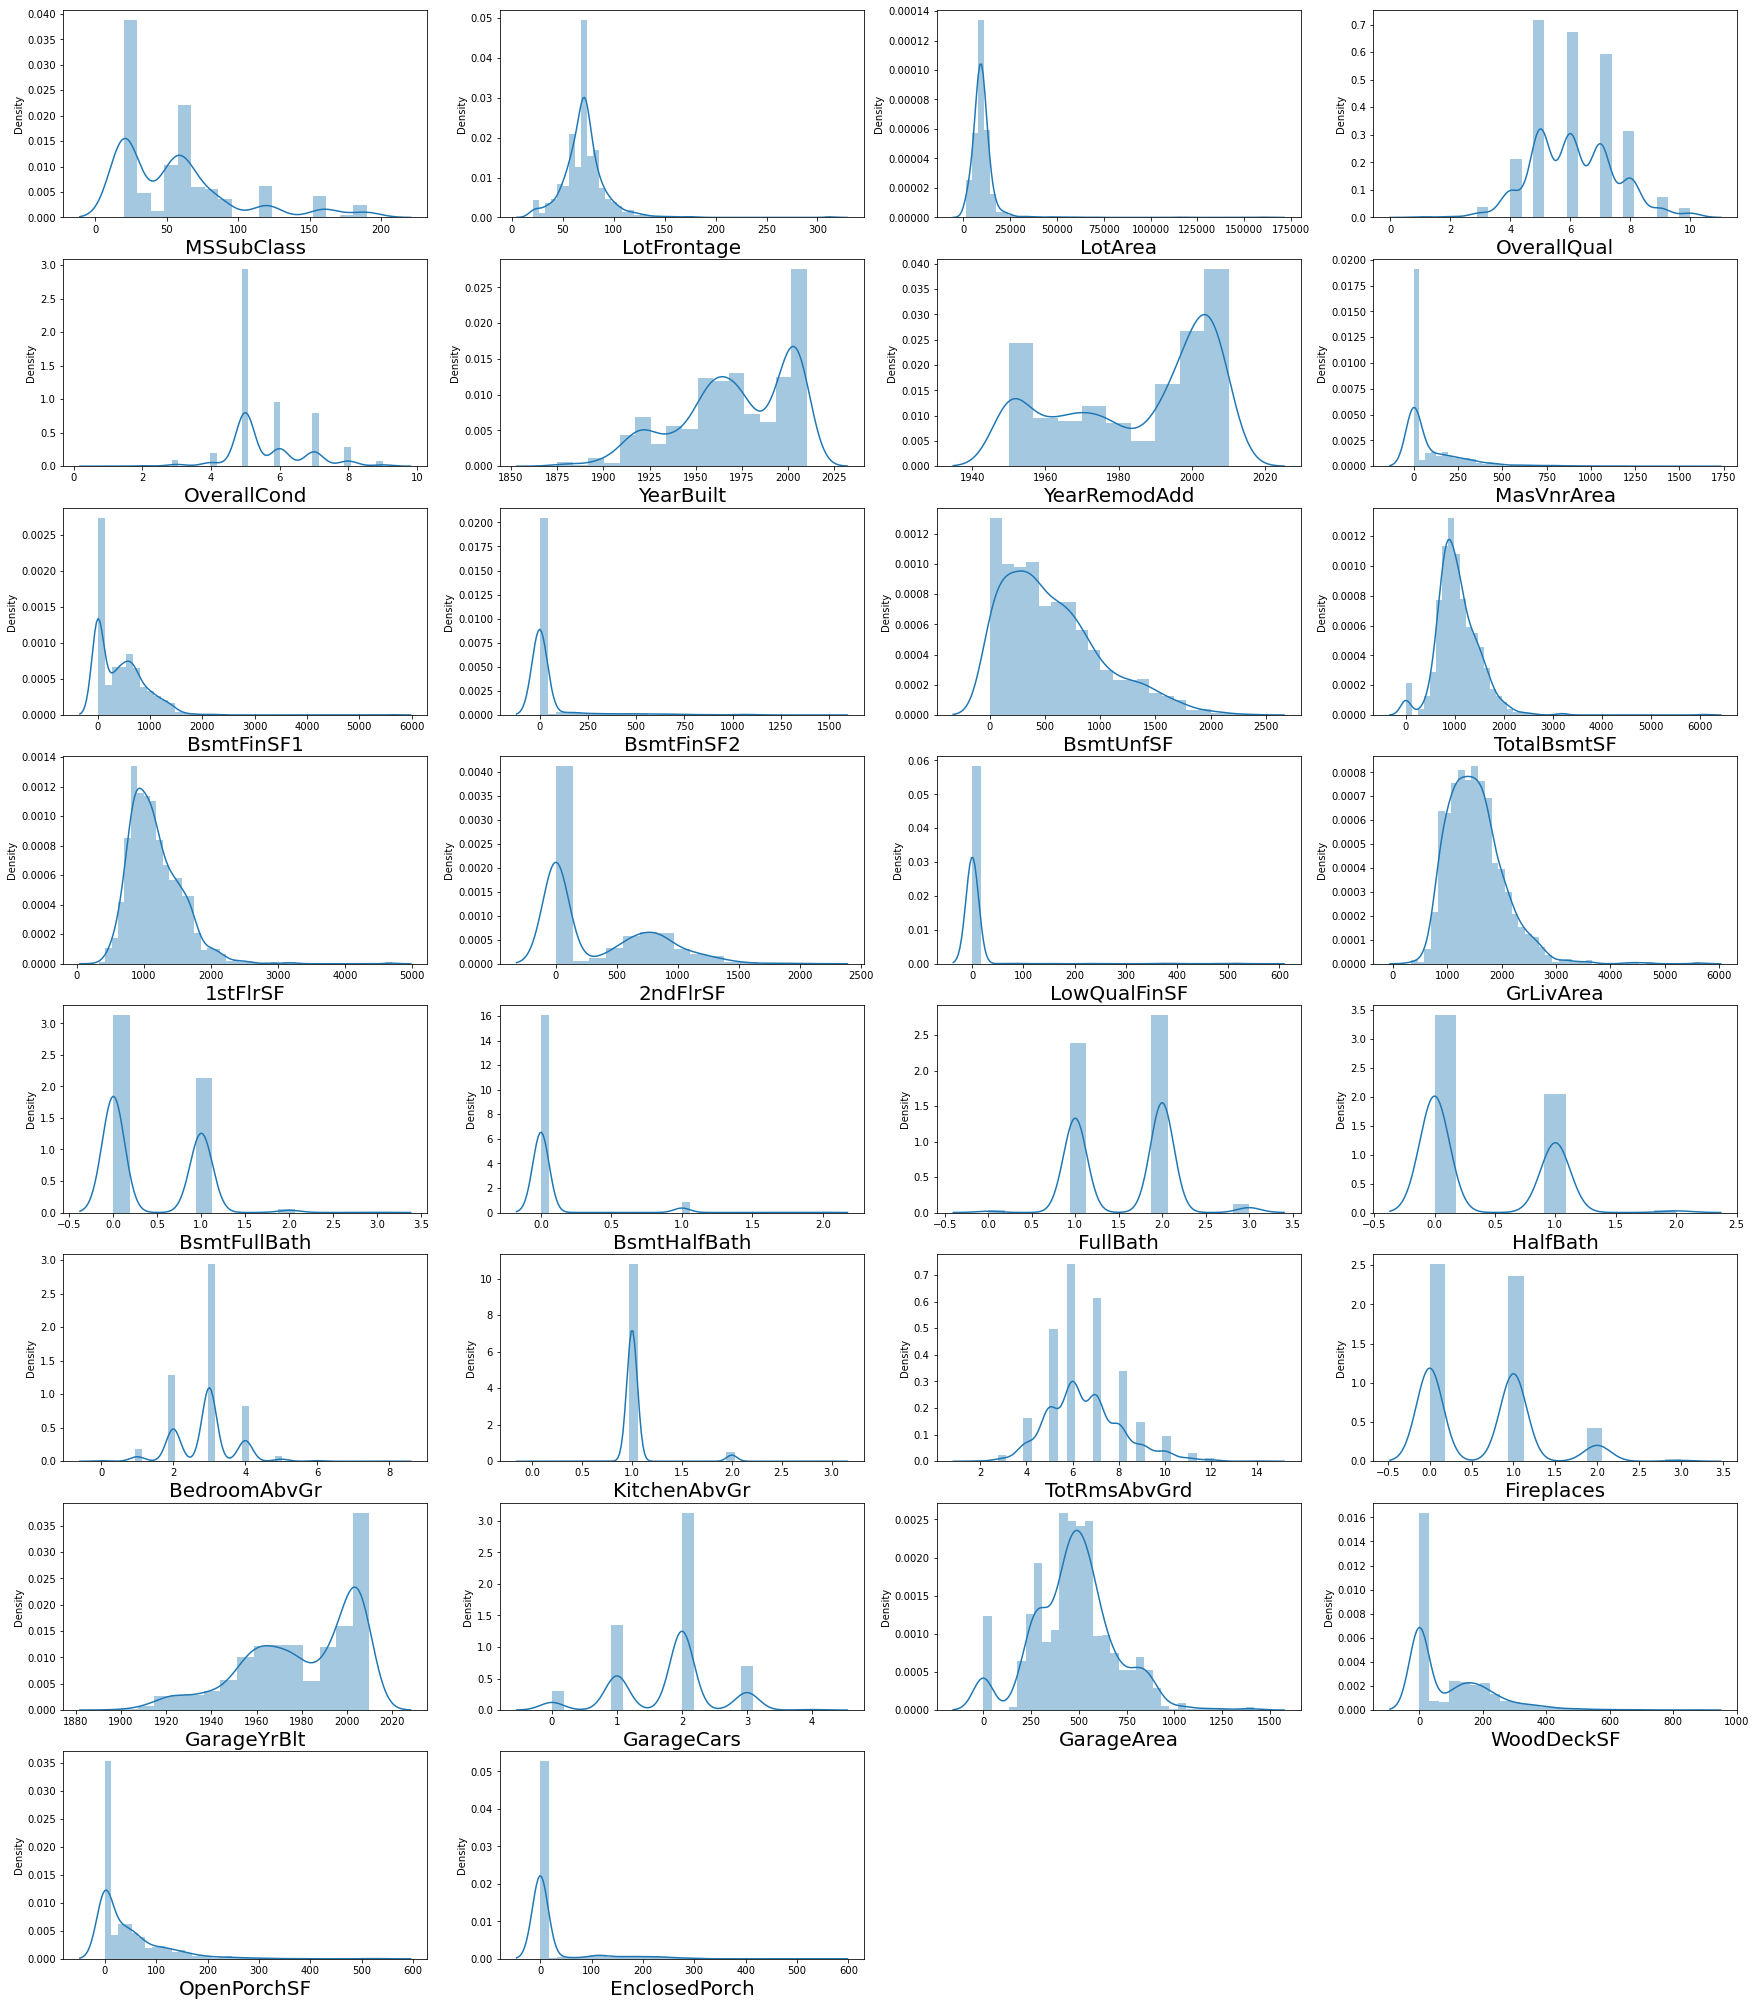

In [53]:
plt.figure(figsize=(30,45),facecolor='white')
plotnum=1
for col in train[train.columns[train.dtypes != 'object']]:
    if plotnum<=30:
        plt.subplot(10,4,plotnum)
        sea.distplot(train[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

##### 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnFSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch' are `skewed and contain outliers.`

In [54]:
train[train.columns[train.dtypes != 'object']].skew()

MSSubClass        1.422019
LotFrontage       2.710383
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.708074
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

`Skewness is Present`

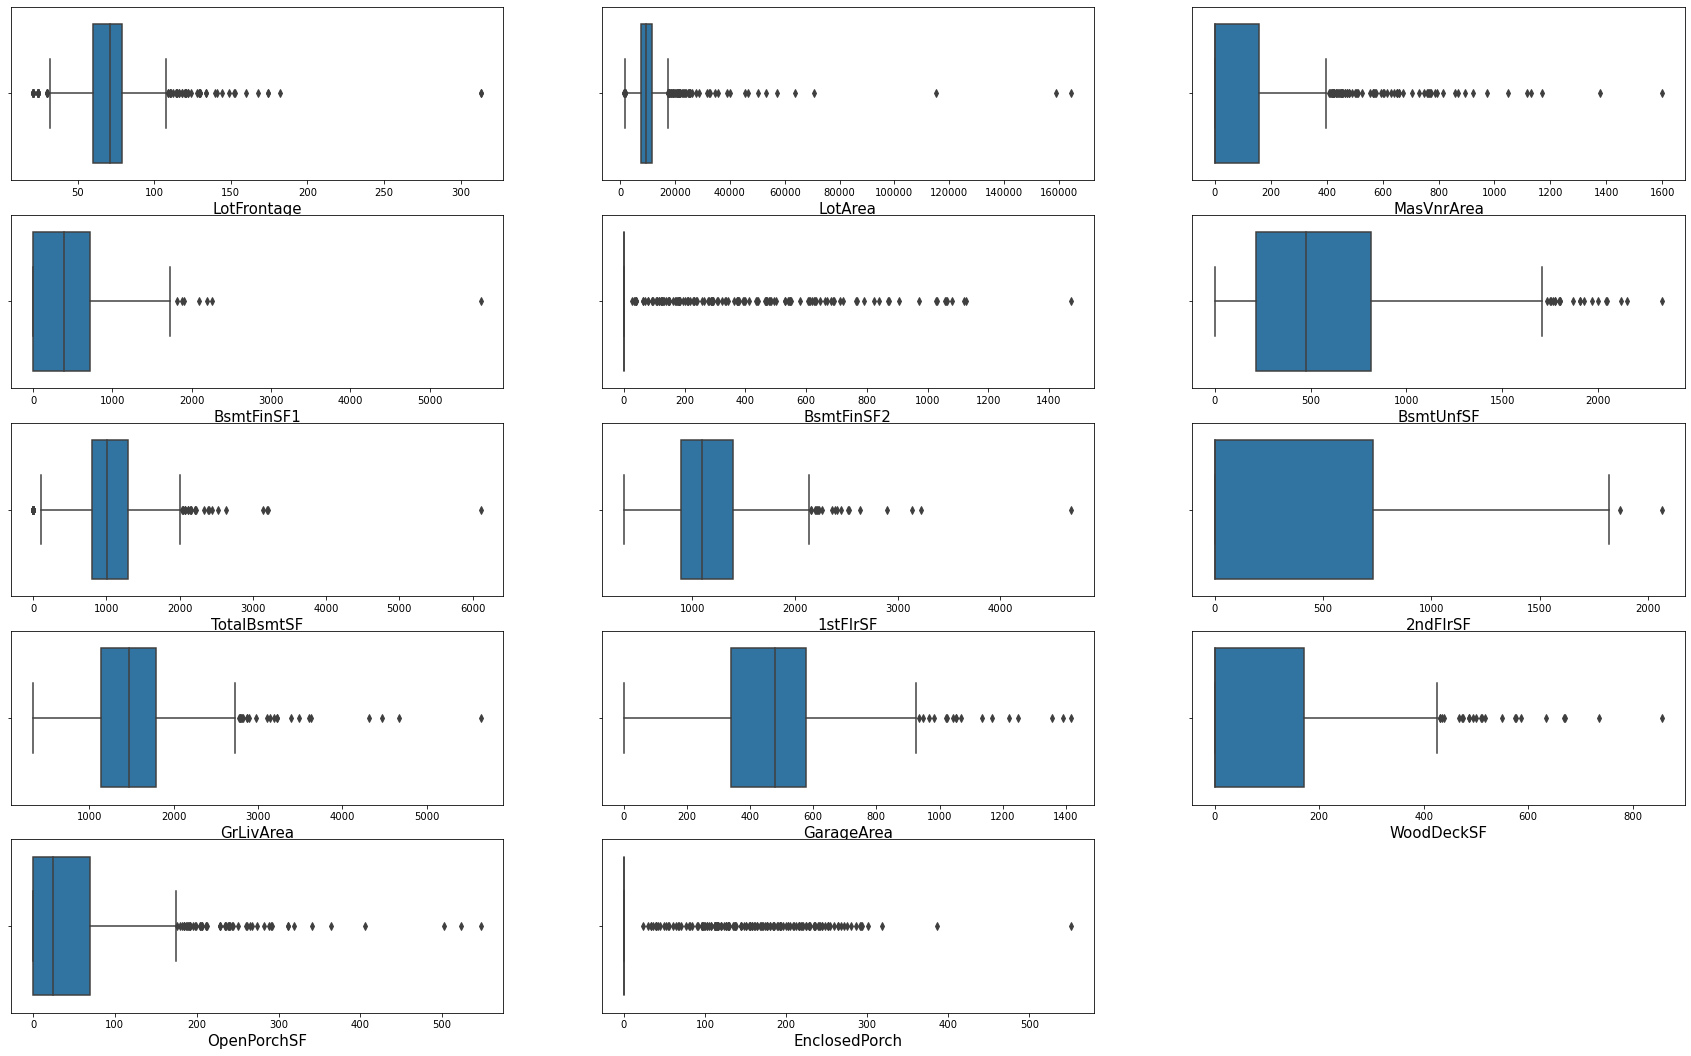

In [55]:
plt.figure(figsize=(30,30),facecolor='white')
plotnum=1
for col in train[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']]:
    if plotnum<=20:
        plt.subplot(8,3,plotnum)
        sea.boxplot(train[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

`Outliers are Present.`

##### Checking Skewness.

In [56]:
train[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']].skew()

LotFrontage       2.710383
LotArea          10.659285
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
GrLivArea         1.449952
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
dtype: float64

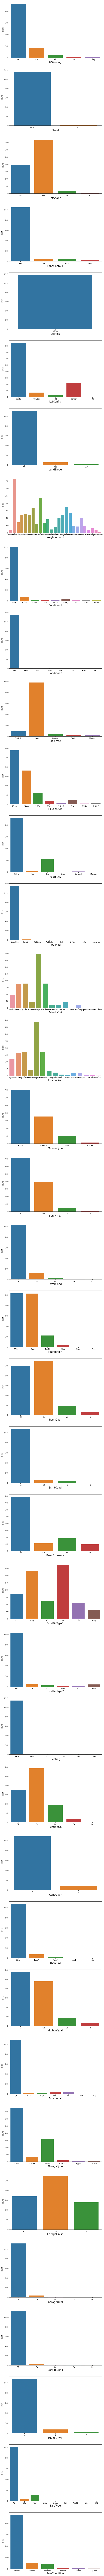

In [57]:
plt.figure(figsize=(10,300),facecolor='white')
plotnum=1
for col in train[train.columns[train.dtypes == 'object']]:
    if plotnum<=40:
        plt.subplot(40,1,plotnum)
        sea.countplot(train[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

##### Following observations are made from above graphs:

- Residential Low Density is the most common zoing classification
- Most common Street Type is 'Pave'
- Regular is the most common LotShape, followed by Slightly irregular
- Most Properties have Near Flat/Level LandContour
-  All public Utilities are available
- Inside lot is the most common Lot configuration
- Slope of property land is most commonly gentle
- Most Housing properties are situated in Neighborhoods of North Ames, followed by College Creek,Edwards and Old Town

- Most Housing properties are in proximity to Normal conditions
-  Most Housing properties are of Single-family Detached type  
-  Most Housing properties 1 storied and 2 storied
- Most Houses have Gable roof style
- Most Houses have roofs made of Standard (Composite) Shingle
- Vinyl Siding is the most common exterior covering used
- Most Houses don't have a Masonry veneer type while some have Brick Face
- The quality of the material on the exterior is most commonly average/typical
- The present condition of the material on the exterior is most commonly average/typical
- Two of the most common foundation types are Cinder Block and Poured Contrete
- The height of the basement is usually either Typical (80-89 inches) or Good (90-99 inches)
- The general condition of the basement is commonly Typical with slight dampness
- Basements most commonly have no exposure
- Most houses have Basements that are usually unfinished followed by houses with basements having Good Living Quarters
    
- Most houses have Gas forced warm air furnace heating arrangement
- Most houses have Excellent Heating quality and condition
- Most houses have Central air conditioning
- Most houses have Standard Circuit Breakers & Romex Electrical system
- Most houses have Most houses have Typical/Average and Good Kitchen quality
- Most houses have Typical Functionality    
- Most houses have a Garage Attached to home
- Most houses have an Unfinished garage
- Garage is usually Typical/Average
- Garage condition is usually Typical/Average
- Most houses have a Paved driveway
- Warranty Deed - Conventional is the most common Type of sale  
- Condition of sale is most commonly a Normal Sale

### Interpreting Relationship between Dependent Variable and Independent Variable Columns

Text(0.5, 1.0, 'Price Trend')

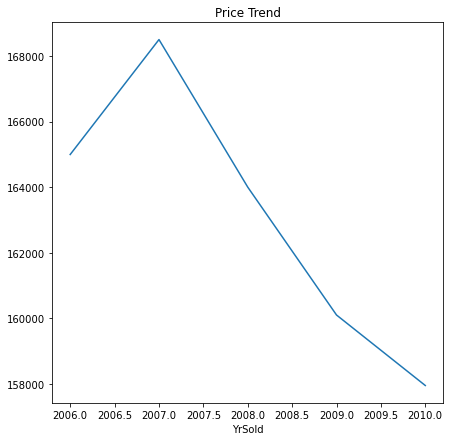

In [58]:
plt.figure(figsize=(7,7))
train.groupby('YrSold').median()['SalePrice'].plot()
plt.title('Price Trend')

` Graph shows Sales was highest B/W year 2006-2007 then it falls continusly since.`

Text(0.5, 1.0, 'Price Trend')

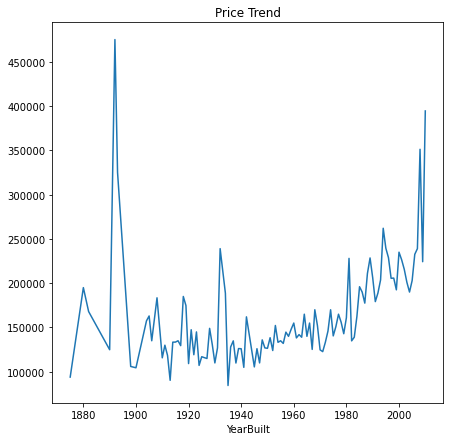

In [59]:
plt.figure(figsize=(7,7))
train.groupby('YearBuilt').median()['SalePrice'].plot()
plt.title('Price Trend')

`Graph above shows that:-` 
- The sales value was highest for house built b/w 1880-1900 may be because of thier Heritage value.
- Recent Built houses have higer sales value.

Text(0.5, 1.0, 'Price Trend')

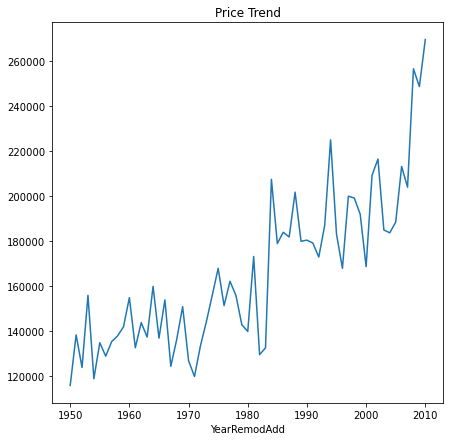

In [60]:
plt.figure(figsize=(7,7))
train.groupby('YearRemodAdd').median()['SalePrice'].plot()
plt.title('Price Trend')

`Graph above shows`
- Houses remodlled recently have higher Sales Value.

Text(0.5, 1.0, 'Price Trend')

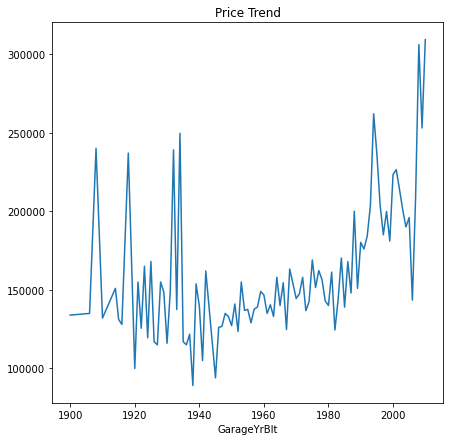

In [61]:
plt.figure(figsize=(7,7))
train.groupby('GarageYrBlt').median()['SalePrice'].plot()
plt.title('Price Trend')

Graph shows houses with recently built Garage have higher Sales Value

#### Getting the Actual age of the houses and other addition in the house from the relevent columns to relate with the target column for good model built.

In [62]:
train['House_Age'] = train['YearBuilt'].apply(lambda y: 2021 - y) 
train['Remod_Age'] = train['YearRemodAdd'].apply(lambda y: 2021 - y)
train['Garage_age'] = train['GarageYrBlt'].apply(lambda y: 2021 - y) 

In [63]:
# Dropping the 'YearBuilt','YearRemodAdd','GarageYrBlt' columns since they are no longer needed
train.drop(columns = ['YearBuilt','YearRemodAdd','GarageYrBlt'],inplace = True) 

#### Performing same operations on test DataSet.

In [64]:
test['House_Age'] = test['YearBuilt'].apply(lambda y: 2021 - y) 
test['Remod_Age'] = test['YearRemodAdd'].apply(lambda y: 2021 - y) 
test['Garage_age'] = test['GarageYrBlt'].apply(lambda y: 2021 - y) 


In [65]:
#dropping the 'YearBuilt','YearRemodAdd','GarageYrBlt' columns from test DataSet since they are no longer needed

test.drop(columns = ['YearBuilt','YearRemodAdd','GarageYrBlt'],inplace = True) 

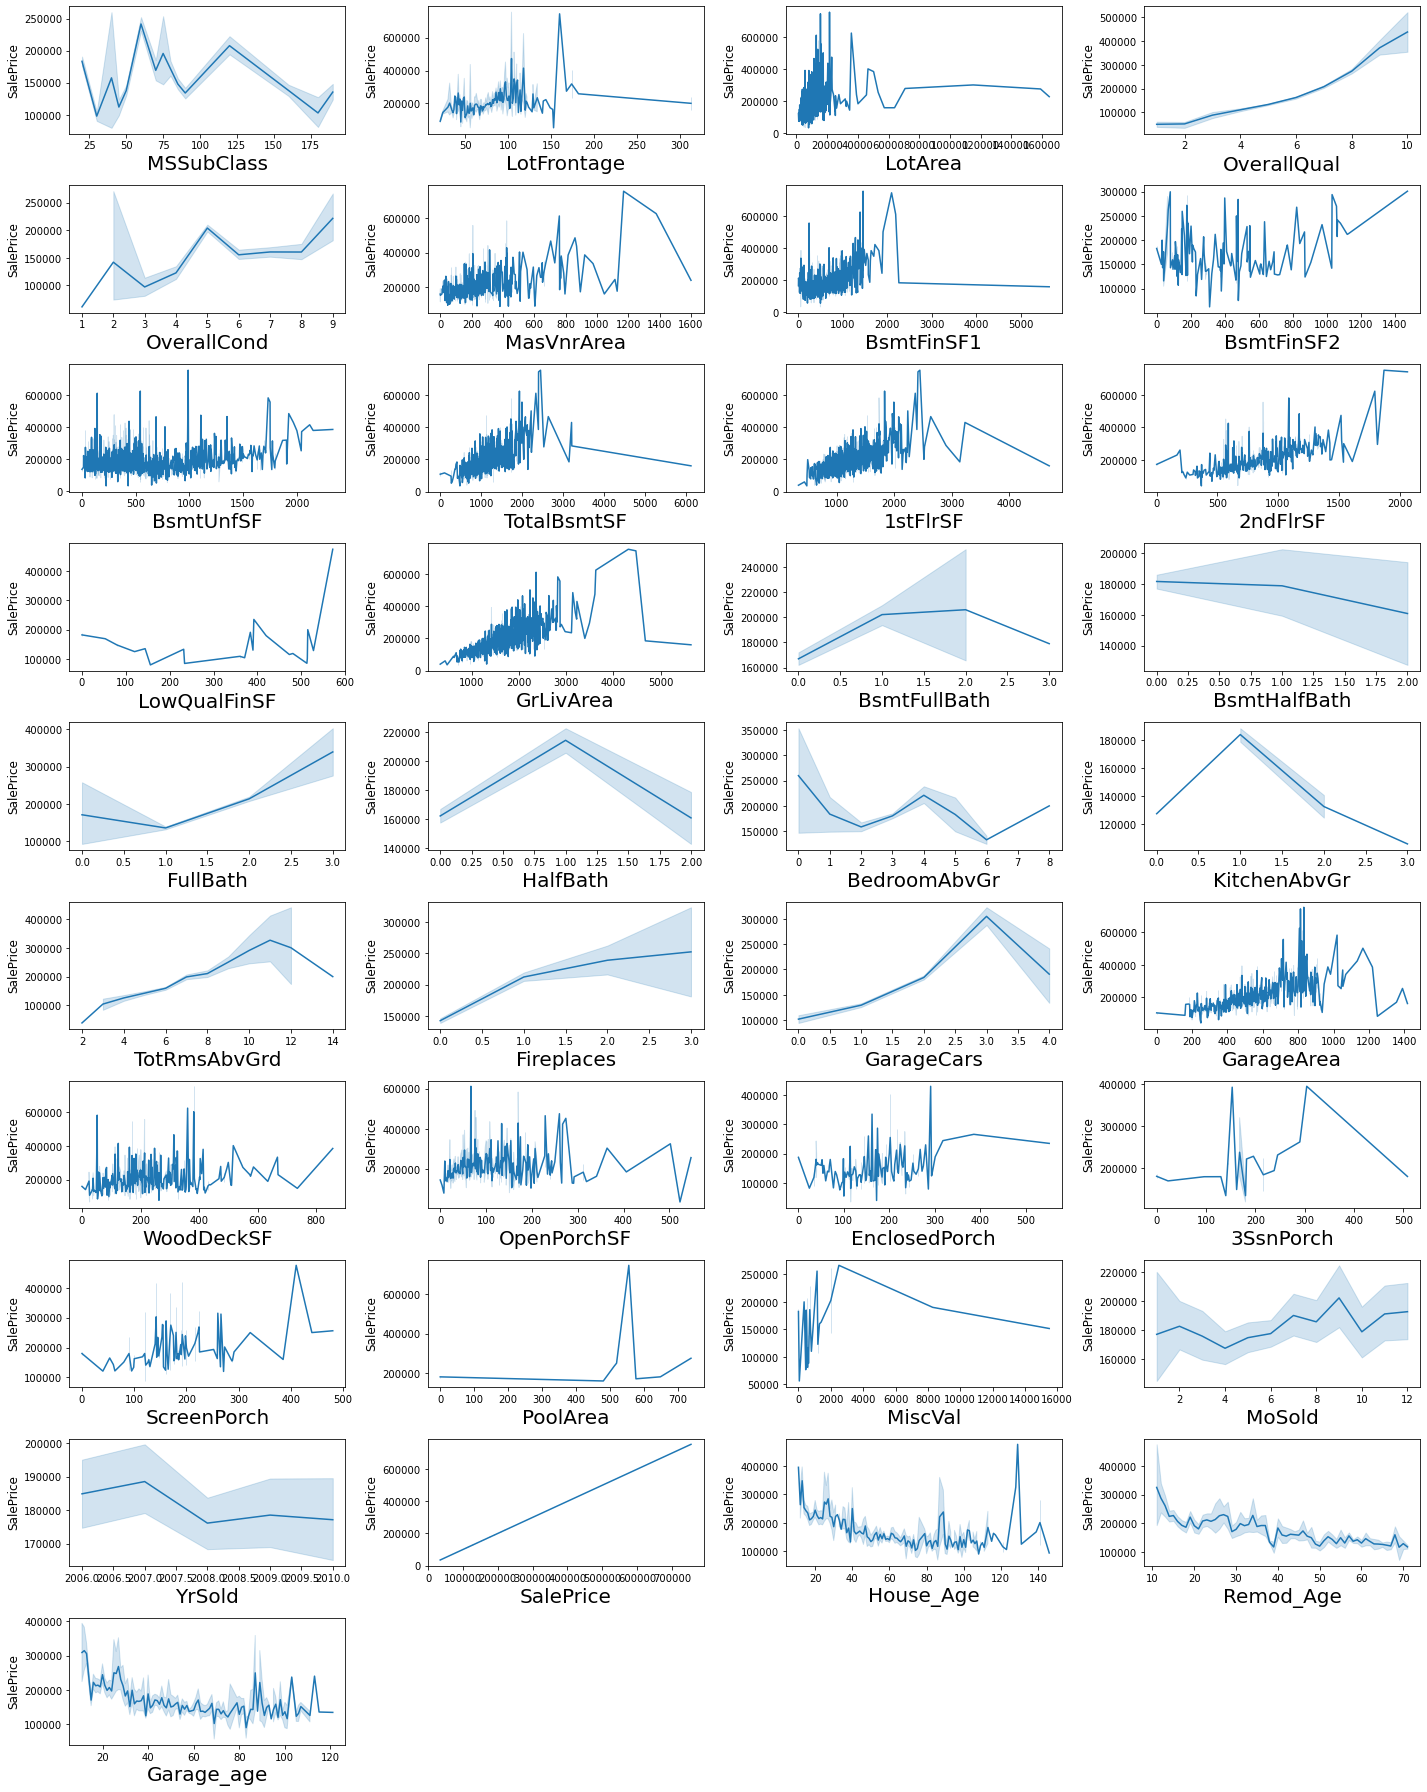

In [66]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = train['SalePrice']
train.drop(columns=['SalePrice'])
for col in train[train.columns[train.dtypes != 'object']]:
    if plotnum<=40:
        plt.subplot(10,4,plotnum)
        sea.lineplot(train[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('SalePrice',fontsize=12)
    plotnum+=1
plt.tight_layout()

` From the above graphs we can observe that:`
 
- 1 story and 2 and 2.5 story houses built in 1946 and newer fetch the highest amount in sales.
    
- Houses with LotFrontage between 100 ft and 200 ft are sold for the highest amount.
    
- Houses wtih Lot area upto 25000 sqft fetch the highest amount.
- There is a Linear positive relation between Overall Quality and SalesPrice
- There is a Linear positive relation between Overall Condition and SalesPrice
- There is a Linear positive relation between Masonry veneer area and SalesPrice
- Most Sales were done for Type 1 Finished basement with area upto 2500 sqft
- There is a Linear positive relation between Type 2 Finished basement area and SalesPrice
- There is a Linear positive relation between Total Basement area and SalesPrice
- There is a Linear positive relation between Total 1st area and 2nd floor area and SalesPrice
- There is a Linear positive relation between low Quality finished square feet and SalesPrice
- There is a Linear positive relation between Above grade living area square feet and SalesPrice
- There is a Linear negative relation between basment half bath and SalesPrice
- There is a Linear positive relation between Full Bathroom and SalesPrice
- There is a Linear positive relation between Total rooms above grade and SalesPrice
- There is a Linear positive relation between Fireplaces and SalesPrice
- There is a Linear positive relation between Garage Car capacity and SalesPrice
- There is a Linear positive relation between Garage area and SalesPrice
- Sales Prices peaked between 0-400 square feet area for Wooden Deck
- Sales Prices peaked between 0-300 square feet area for Open Porch
- Sales Price and Enclosed Porch area have a positive relation
- Sales Price and 3 season Porch area have a positive relation
- Sales Price and screen Porch area have a positive relation
- Sales Price and Month Sold have a positive relation
- Sales Price and Month Sold have a positive relation
- Sales Price and house age have a negative relation
- Sales Price and remodelling age have a negative relation
- Sales Price and Garage age have a negative relation


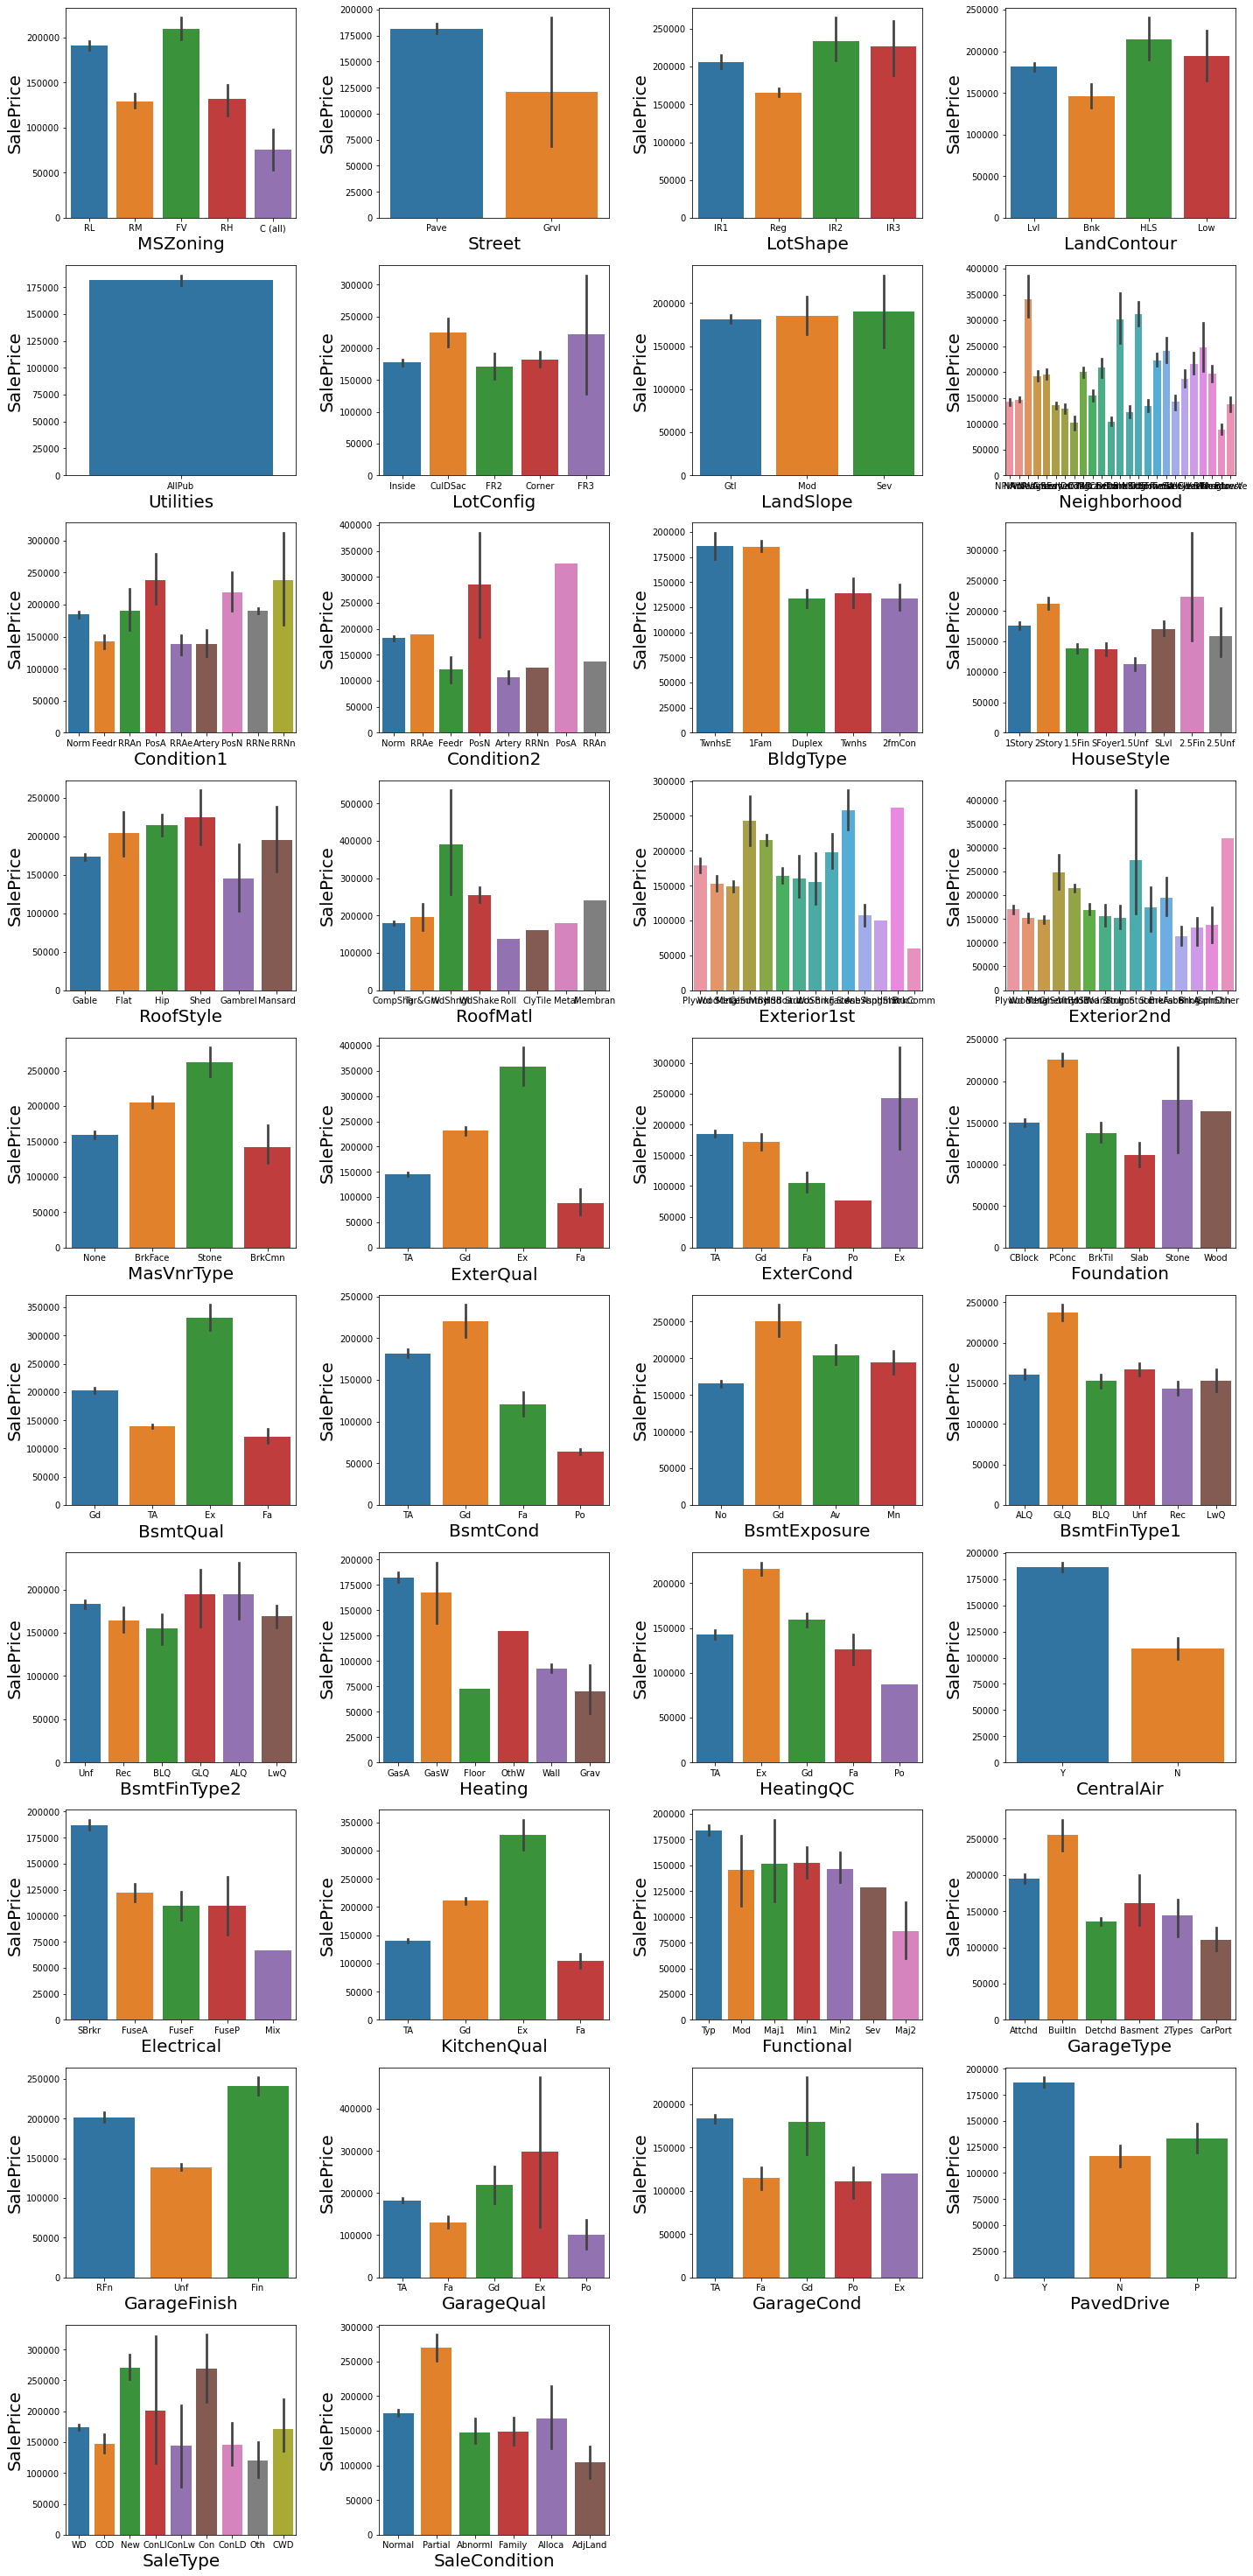

In [67]:
plt.figure(figsize=(20,41),facecolor='white')
plotnum=1
y = train['SalePrice']
for col in train[train.columns[train.dtypes == 'object']]:
    if plotnum<=40:
        plt.subplot(10,4,plotnum)
        sea.barplot(train[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('SalePrice',fontsize=20)
    plotnum+=1
plt.tight_layout()

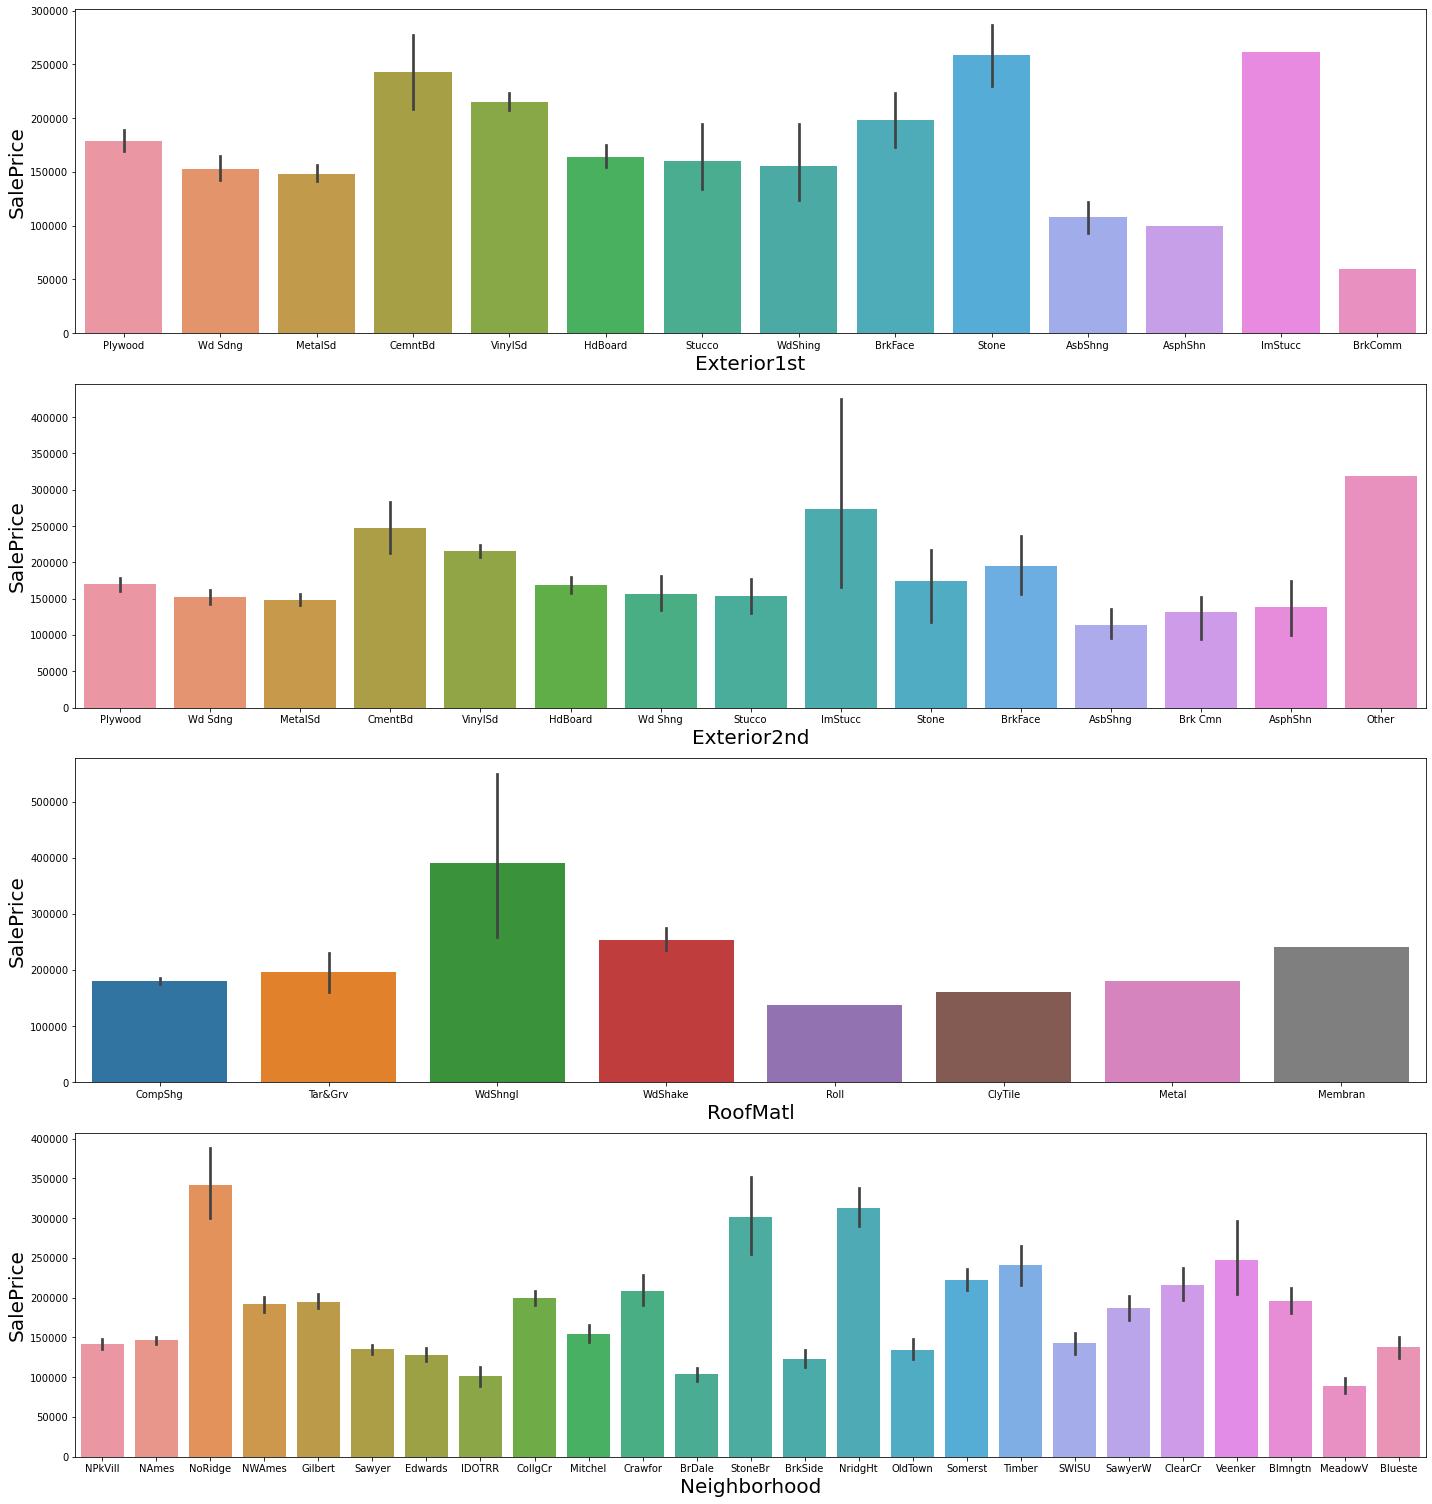

In [68]:
plt.figure(figsize=(20,21),facecolor='white')
plotnum=1
y = train['SalePrice']
for col in train[['Exterior1st','Exterior2nd','RoofMatl','Neighborhood']]:
    if plotnum<=4:
        plt.subplot(4,1,plotnum)
        sea.barplot(train[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('SalePrice',fontsize=20)
    plotnum+=1
plt.tight_layout()

`Graphs above describes:`

- Saleprice is highest for Floating Village and Low density Residential zones
- Saleprice is highest for housing properties near paved streets
- Saleprice is highest for irregular lot shapes
- Hill side properties sell for the highest amount
- Utilities and Landslope columns don't show a strong relationship with Sales Price
- Housing Properties in Northridge, Stone Brook,Northridge Heights,Timberland, Somerset,Veenker fetch the highest Sales amount
- Cul-de-sac and 3 sided frontage lot configurations fetch the highest Sales amount
- Proximity to Railroads, Off-site features like parks etc fetch the highest Sales amount
- Townhouse and Single-family Detached are the most valued
- Two story and Two and one-half story: 2nd level finished sell for the highest amount
- Houses with Wood Shingle Roofs sell for the highest amount
- Houses with Exterior covering of Cement Board,Stone,Imitation Stucco sell for the highest amount
- Houses with Stone Mason veneer type sell for the highest amount
- Houses with Excellent exterior material quality sell for the highest amount
- Houses with Excellent exterior material condition  sell for the highest amount
- Houses with Poured Contrete and stone foundation types sell for the highest amount
- Houses with Excellent (100+ inches) height of the basement sell for the highest amount
- Houses with Excellent Basement Condition sell for the highest amount
- Houses with Good  Basement Exposure sell for the highest amount
- Houses with Good and Average Living Quarters in Basement sell for the highest amount
- Houses with Gas forced warm air furnace and Gas hot water heating systems sell for the highest amount
- Houses with Excellent Heating quality and condition sell for the highest amount
- Houses with Central Air Conditioning sell for the highest amount
- Houses with Standard Circuit Breakers & Romex sell for the highest amount
- Houses with Excellent Kitchen Quality sell for the highest amount
- Houses with Built in Garages sell for the highest amount
- Houses with Good / Typical Garage condition sell for the highest amount
- Houses with Finished Garage sell for the highest amount
- Houses with excellent Garage Quality sell for the highest amount
- Houses with Paved Driveway sell for the highest amount 
- Homes just constructed and sold, Contract 15% Down payment regular terms sell for the highest amount 
- New Homes(not completed when last assessed) sell for the highest amount 

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

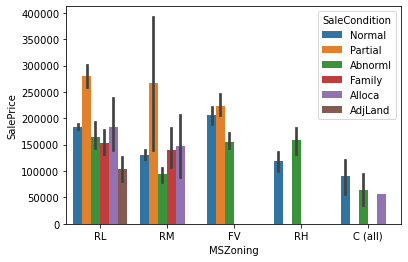

In [69]:
sea.barplot(train['MSZoning'],train['SalePrice'],hue = train['SaleCondition'])

New Homes are the most popular in all types of zoning

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

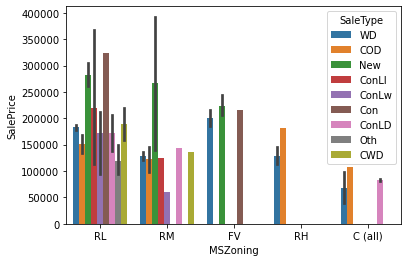

In [70]:
sea.barplot(train['MSZoning'],train['SalePrice'],hue = train['SaleType'])

New houses and Low interest contract are the most popular sales type in low density, medium density and floating village residentials.

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

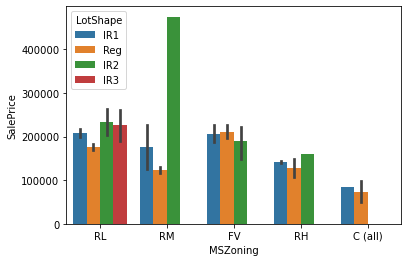

In [71]:
sea.barplot(train['MSZoning'],train['SalePrice'],hue = train['LotShape'])

Partially irregular and irregular plot shapes are most popular in low and medium residential zones

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

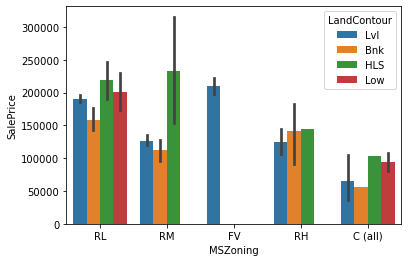

In [72]:
sea.barplot(train['MSZoning'],train['SalePrice'],hue = train['LandContour'])

Low density and medium density zones settled near hillsides and depressions are mostly sold at higher prices, whereas floating villages are settled in flat regions, and high density zones settle near banked regions sell for the highest prices

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

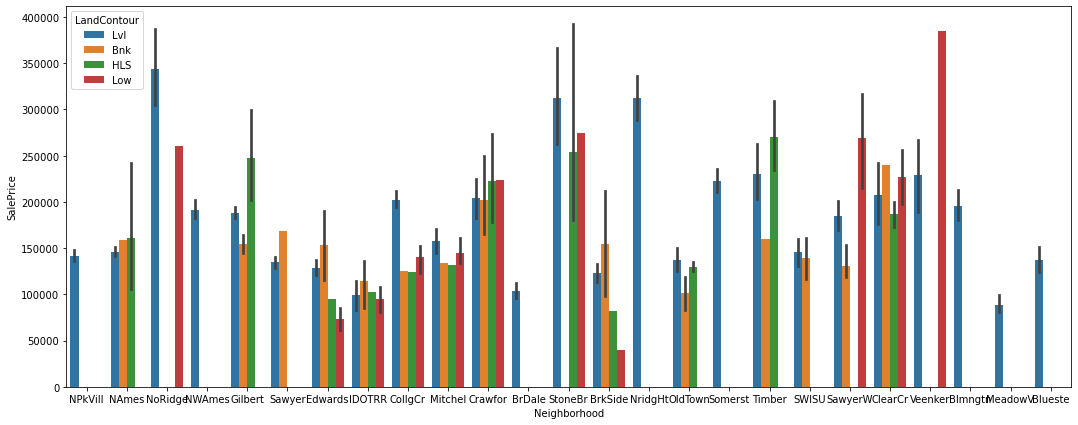

In [73]:
plt.figure(figsize=(18,7),facecolor='white')
sea.barplot(train['Neighborhood'],train['SalePrice'],hue = train['LandContour'])

- Most housing properties established in levelled regions in North Ridge sell for the highest.

- Most Housing properties in levelled regions of Stone Brook sell for highest followed by banked region and hillsides. 

- Houses in levelled region of NorthRidge heights sell for the most while housing properties in depressed regions of Veenker sell for the highest prices.

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

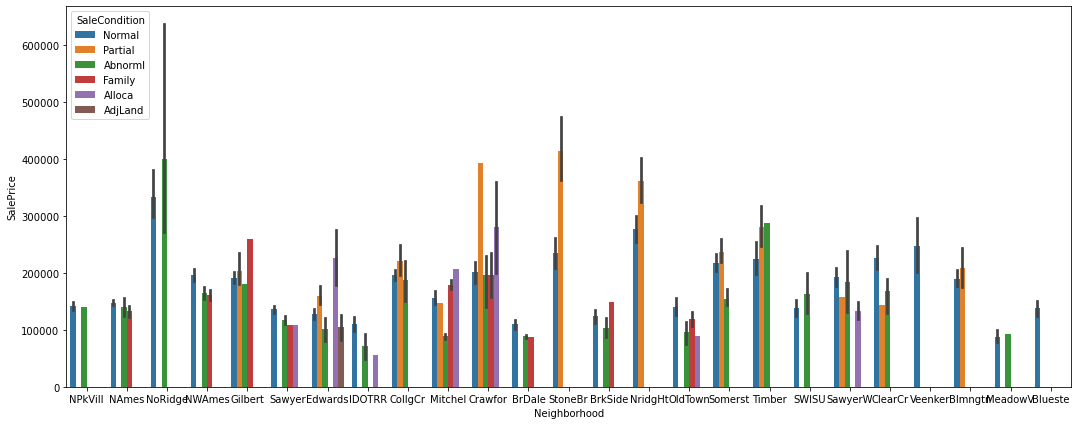

In [74]:
plt.figure(figsize=(18,7),facecolor='white')
sea.barplot(train['Neighborhood'],train['SalePrice'],hue = train['SaleCondition'])

- Most housing properties that are newly established in Crawford,Stone Brook, Timberlane,North Ridge Heights,Bloomington Heights sell for the highest.

- Most Housing properties in North Ridge sell for trade, foreclosure, short sale and normal sale in North Ridge.


<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

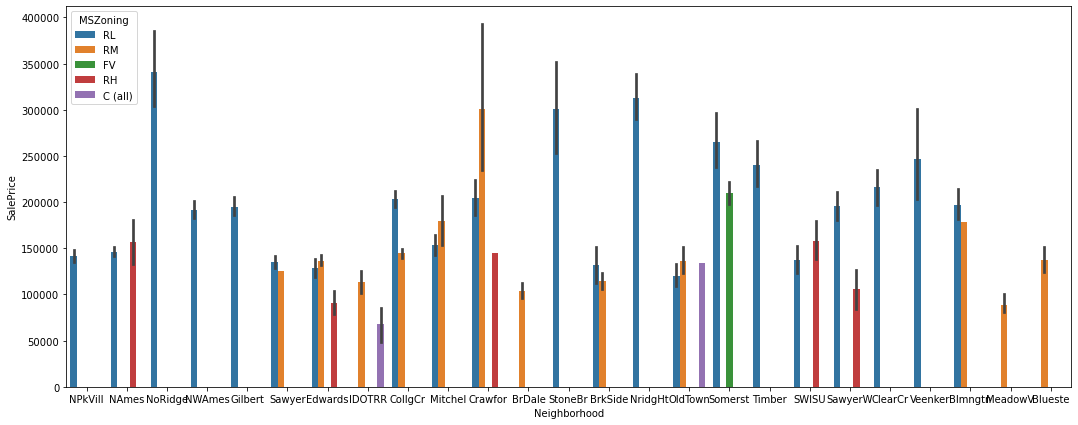

In [75]:
plt.figure(figsize=(18,7),facecolor='white')
sea.barplot(train['Neighborhood'],train['SalePrice'],hue = train['MSZoning'])

- Most houses sold in North Ridge,North Ridge Heights, Somerset,TimberLane,Veenker, Bloomington Heights are in low density residential zones.

- North Ames has more houses sold in High density residential zones, while Crawford has more houses sold in medium density residential zones.

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

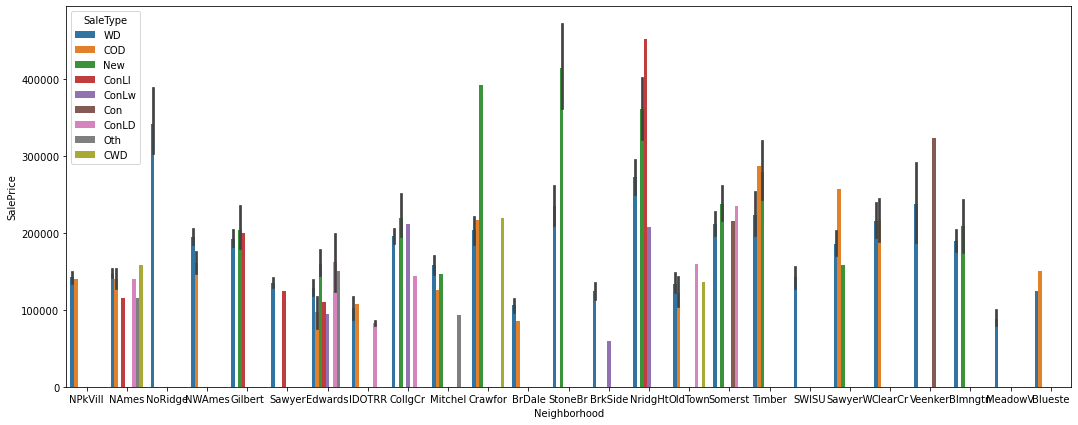

In [76]:
plt.figure(figsize=(18,7),facecolor='white')
sea.barplot(train['Neighborhood'],train['SalePrice'],hue = train['SaleType'])

Warranty Deed - Conventional,Home just constructed and sold,Contract Low InterestCourt Officer Deed/Estate are the most common sale types.

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

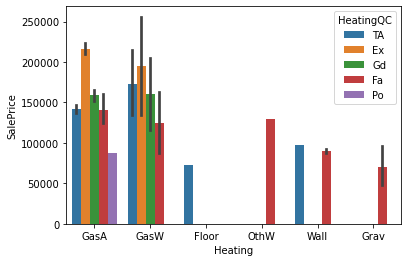

In [77]:
sea.barplot(train['Heating'],train['SalePrice'],hue = train['HeatingQC'])

Excelent quality of Gas forced warm air furnace and Gas hot water heating systems fetches the highest amount of money

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

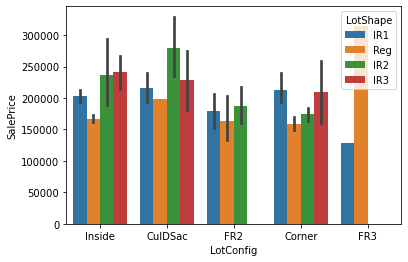

In [78]:
sea.barplot(train['LotConfig'],train['SalePrice'],hue = train['LotShape'])

3 sided Frontage properties with Regular plot shape sell for the highest

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

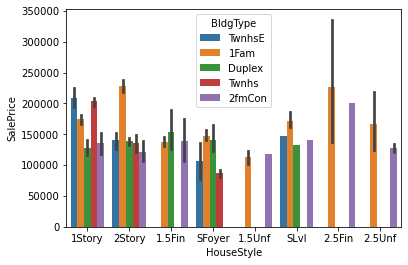

In [79]:
sea.barplot(train['HouseStyle'],train['SalePrice'],hue = train['BldgType'])

Two and one-half story: 2nd level finished housing properties sell for the highest.

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

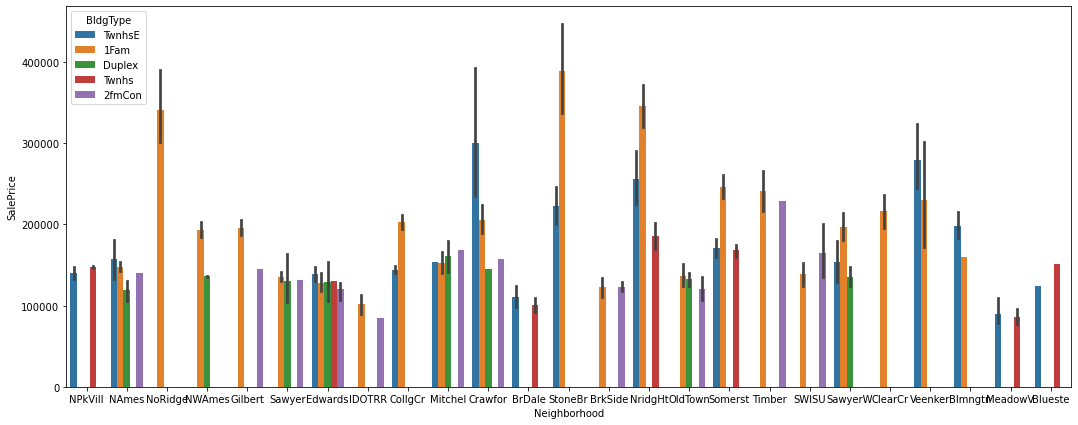

In [80]:
plt.figure(figsize=(18,7),facecolor='white')
sea.barplot(train['Neighborhood'],train['SalePrice'],hue = train['BldgType'])

Single-family Detached housing properties sell for the highest in most neighborhoods

### Encoding Categorical Columns

####  Encoding using Label Encoder

In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
lenc = LabelEncoder()

In [85]:
for col in train[train.columns[train.dtypes == 'object']]:
    train[col] = lenc.fit_transform(train[col])

In [86]:
train['YrSold'] = train.YrSold.map({2007:2,2009:4,2006:1, 2008: 3, 2010: 5}) # encoding years in YrSold Column

In [87]:
train['Utilities'] =train.Utilities.map({0:1})

In [88]:
train.dtypes[train.dtypes != 'object']

MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
                  ...   
SaleCondition      int32
SalePrice          int64
House_Age          int64
Remod_Age          int64
Garage_age       float64
Length: 75, dtype: object

In [89]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labenc = LabelEncoder()

In [91]:
for col in test[test.columns[test.dtypes == 'object']]:
    test[col] = lenc.fit_transform(test[col])

In [ ]:
# encoding years in YrSold Column
test['YrSold'] = test.YrSold.map({2007:2,2009:4,2006:1, 2008: 3, 2010: 5}) 

In [92]:
test['Utilities'] =test.Utilities.map({0:1})

In [93]:
test.dtypes[test.dtypes != 'object']

MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
                  ...   
SaleType           int32
SaleCondition      int32
House_Age          int64
Remod_Age          int64
Garage_age       float64
Length: 74, dtype: object

## getting Coo\rrelation B/W target column and the remaing columns:

In [95]:
h_corr =train.corr()

In [96]:
h_corr

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.007478    -0.336681 -0.124151 -0.035981   
MSZoning         0.007478  1.000000    -0.069661 -0.023328  0.140215   
LotFrontage     -0.336681 -0.069661     1.000000  0.299452 -0.035309   
LotArea         -0.124151 -0.023328     0.299452  1.000000 -0.263973   
Street          -0.035981  0.140215    -0.035309 -0.263973  1.000000   
...                   ...       ...          ...       ...       ...   
SaleCondition   -0.028981  0.004501     0.065091  0.034236  0.014176   
SalePrice       -0.060775 -0.133221     0.323779  0.249499  0.044753   
House_Age       -0.023988  0.299732    -0.112655 -0.005506 -0.020292   
Remod_Age       -0.056618  0.174586    -0.088799 -0.027228 -0.057866   
Garage_age      -0.093390  0.243359    -0.027832  0.054091 -0.001096   

               LotShape  LandContour  Utilities  LotConfig  LandSlope  ...  \
MSSubClass     0.104485    -0.021387        NaN   0.076880  -0.014930  ...   
MSZoning       0.053655     0.001175        NaN  -0.027246  -0.023952  ...   
LotFrontage   -0.144523    -0.073451        NaN  -0.192468   0.046051  ...   
LotArea       -0.189201    -0.159038        NaN  -0.152063   0.395410  ...   
Street        -0.012941     0.105226        NaN   0.000153  -0.141572  ...   
...                 ...          ...        ...        ...        ...  ...   
SaleCondition -0.054905     0.047715        NaN   0.043692  -0.061461  ...   
SalePrice     -0.248171     0.032836        NaN  -0.060452   0.015485  ...   
House_Age      0.230080    -0.153721        NaN  -0.012933   0.085931  ...   
Remod_Age      0.155428    -0.086936        NaN   0.009281   0.048599  ...   
Garage_age     0.163505    -0.098544        NaN   0.001410   0.071849  ...   

               PoolArea   MiscVal    MoSold    YrSold  SaleType  \
MSSubClass     0.009583 -0.023503 -0.016015 -0.038595  0.035050   
MSZoning      -0.001663  0.003416 -0.051646 -0.004964  0.079854   
LotFrontage    0.196001 -0.001329  0.022517 -0.003885 -0.035356   
LotArea        0.097107  0.051679  0.015141 -0.035399  0.005421   
Street         0.004505 -0.030354 -0.008860 -0.019635  0.025920   
...                 ...       ...       ...       ...       ...   
SaleCondition -0.074354  0.012178 -0.003462  0.024505  0.143557   
SalePrice      0.103280 -0.013071  0.072764 -0.045508 -0.050851   
House_Age     -0.006408  0.030008 -0.031754  0.013976  0.062720   
Remod_Age     -0.006874  0.001199 -0.024663 -0.033265 -0.020832   
Garage_age     0.019283  0.037872  0.010998  0.008951  0.021710   

               SaleCondition  SalePrice  House_Age  Remod_Age  Garage_age  
MSSubClass         -0.028981  -0.060775  -0.023988  -0.056618   -0.093390  
MSZoning            0.004501  -0.133221   0.299732   0.174586    0.243359  
LotFrontage         0.065091   0.323779  -0.112655  -0.088799   -0.027832  
LotArea             0.034236   0.249499  -0.005506  -0.027228    0.054091  
Street              0.014176   0.044753  -0.020292  -0.057866   -0.001096  
...                      ...        ...        ...        ...         ...  
SaleCondition       1.000000   0.217687  -0.212597  -0.227400   -0.147132  
SalePrice           0.217687   1.000000  -0.514408  -0.507831   -0.381997  
House_Age          -0.212597  -0.514408   1.000000   0.592829    0.702527  
Remod_Age          -0.227400  -0.507831   0.592829   1.000000    0.562284  
Garage_age         -0.147132  -0.381997   0.702527   0.562284    1.000000  

[75 rows x 75 columns]

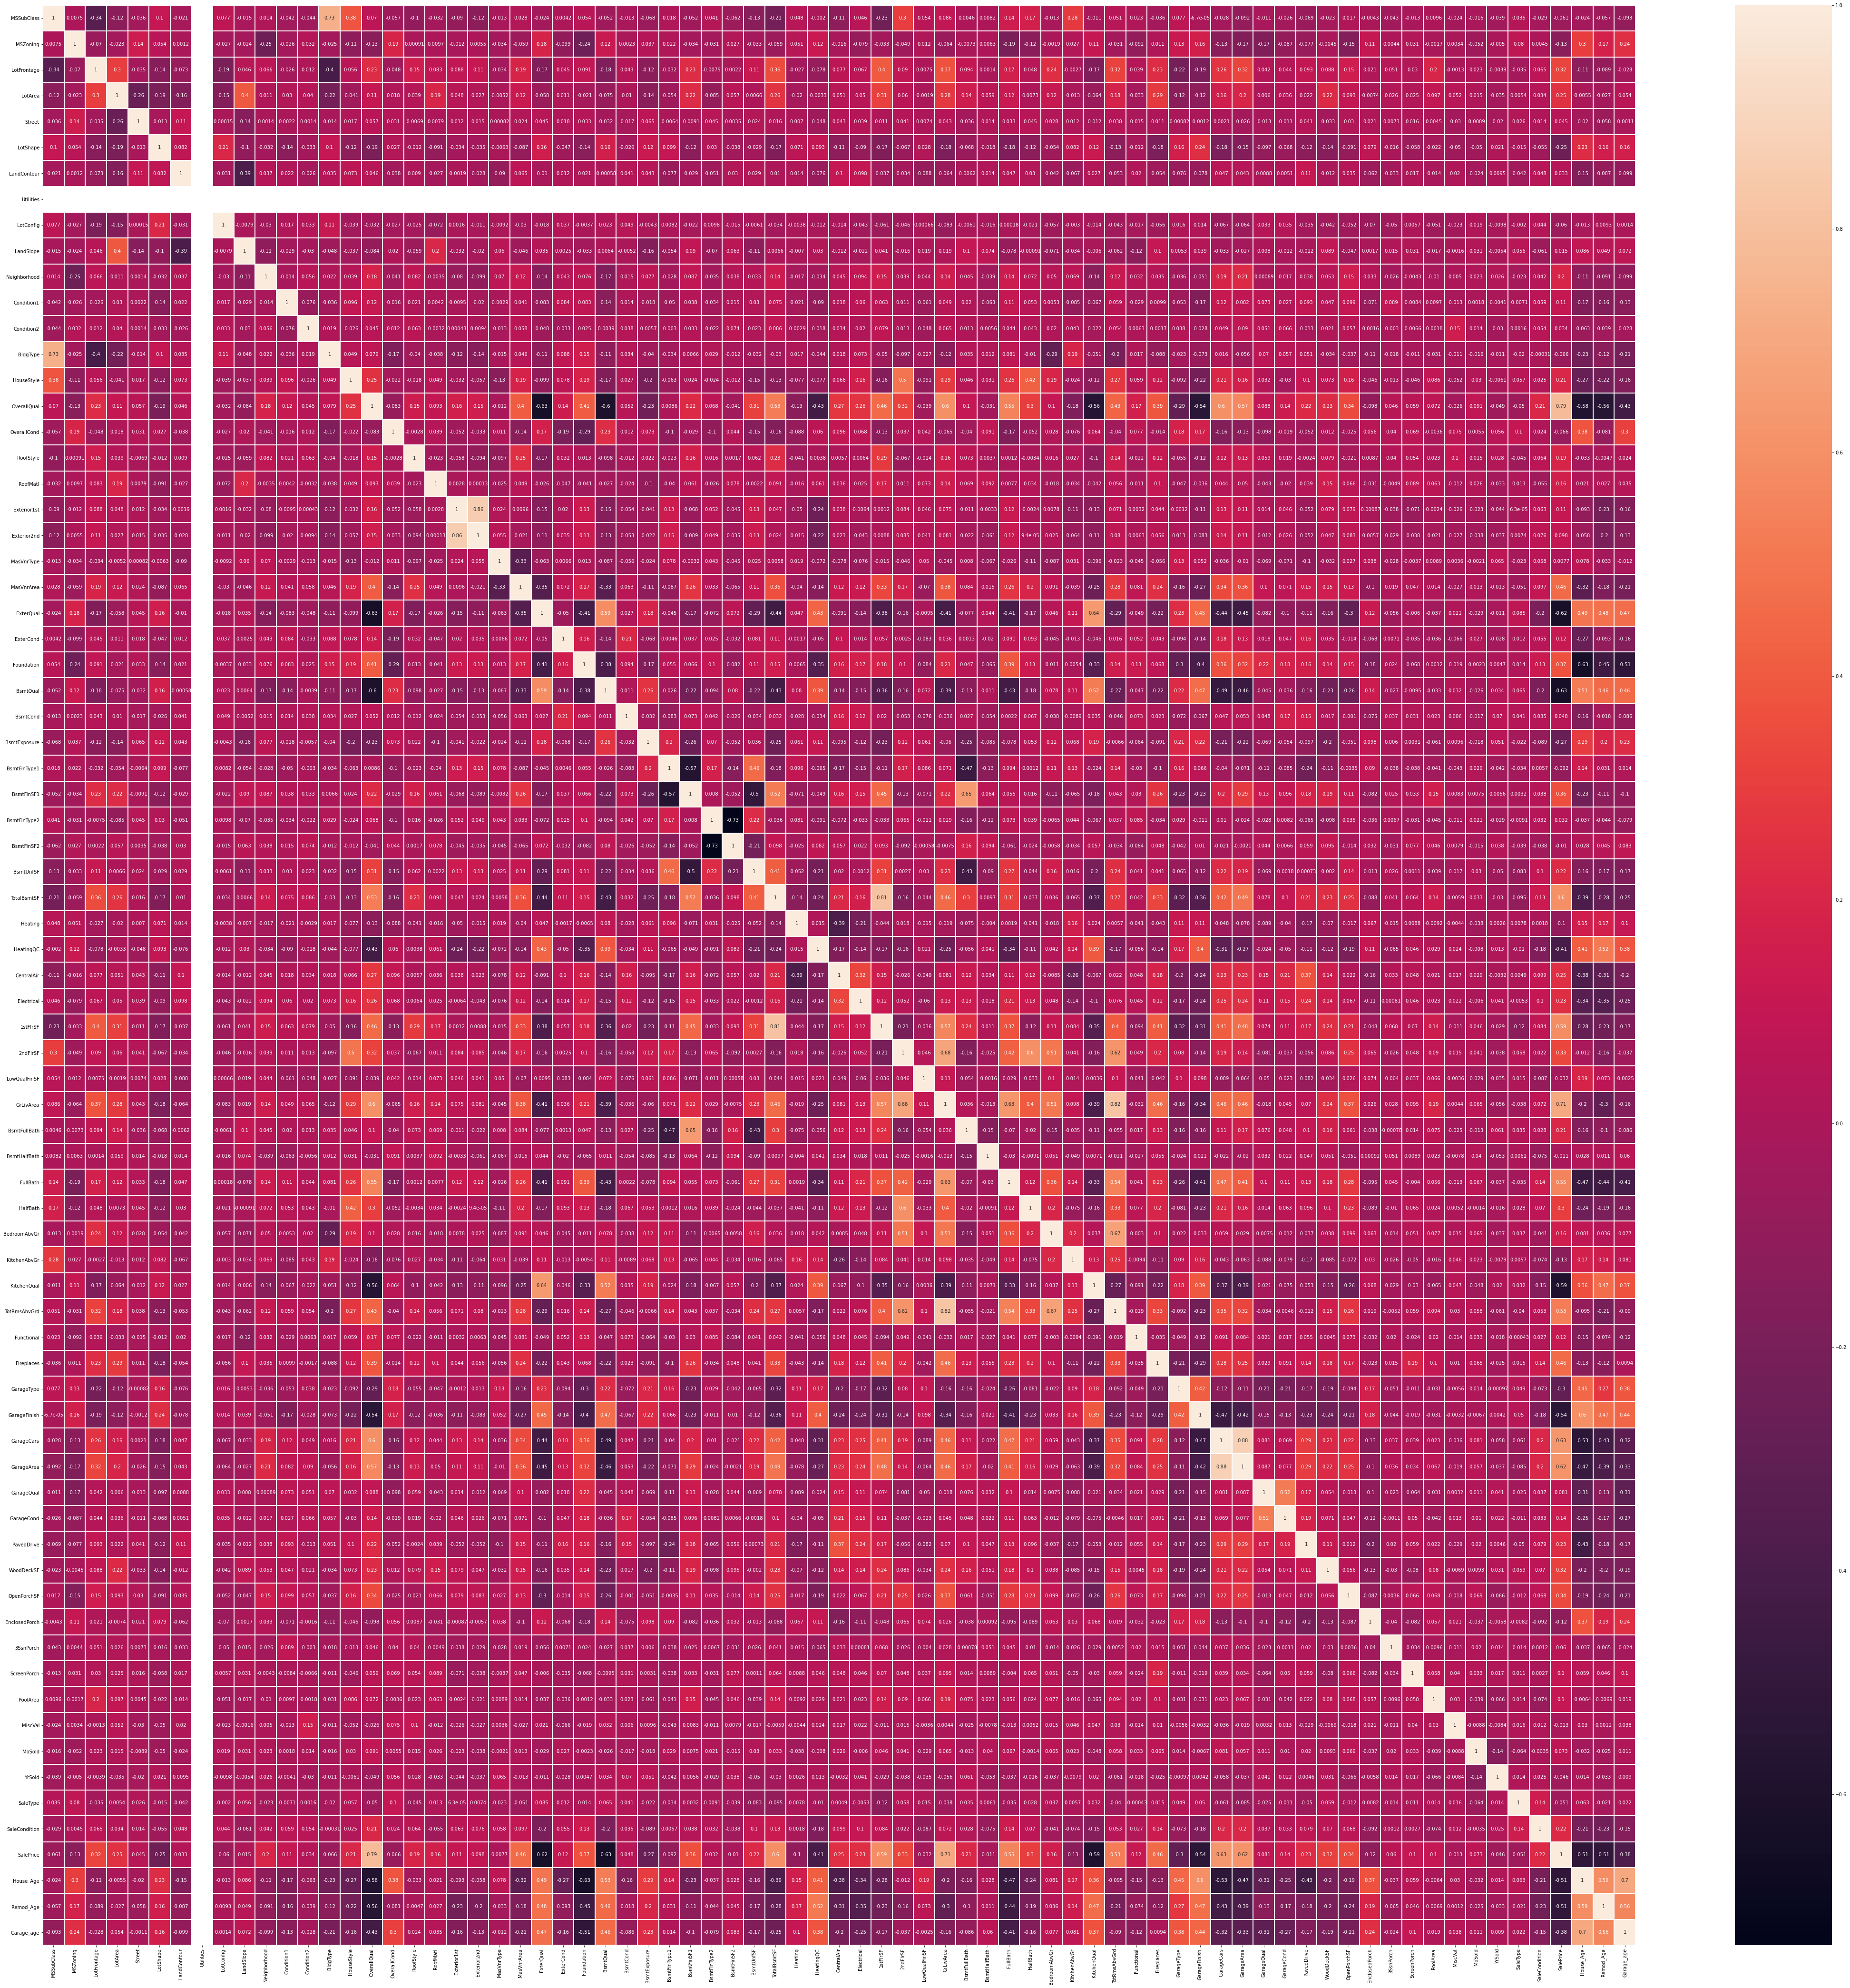

In [104]:
plt.figure(figsize=(75,75))
sea.heatmap(h_corr,annot=True,linewidth=1)
plt.show()

### Visualizing correlation of feature columns with label column.

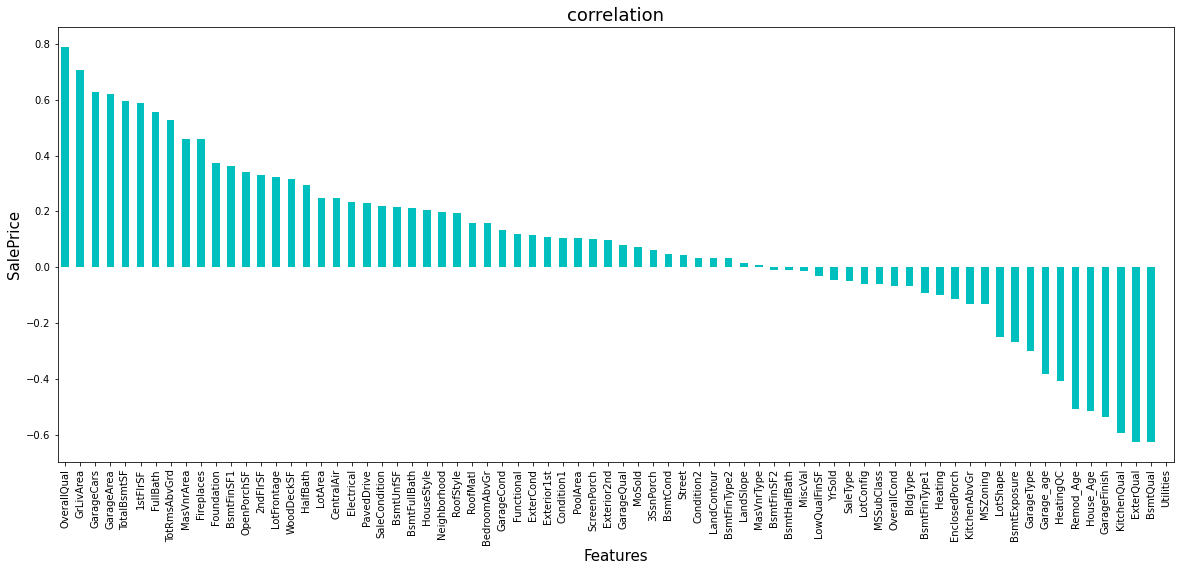

In [105]:
plt.figure(figsize = (20,8))
train.corr()['SalePrice'].sort_values(ascending = False).drop(['SalePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('SalePrice',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

#### Dropping column 'Utilities' since it doesn't contribute to building a good model for predicting the target variable values

In [106]:
train.drop(columns = ['Utilities'],inplace=True)

In [107]:
test.drop(columns = ['Utilities'],inplace=True)

### Removing Outliers in continuous data type columns using Z score Method

In [108]:
 #making a copy of the continuous data type columns with outliers:
    
df2 =train[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']].copy()

In [112]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)]

In [113]:
df3.shape

(1006, 14)

In [114]:
df2.shape

(1168, 14)

In [115]:
loss=(1168-1006)/1168 * 100
loss

13.86986301369863

#### Normalizing Data Distribution using PowerTransformer

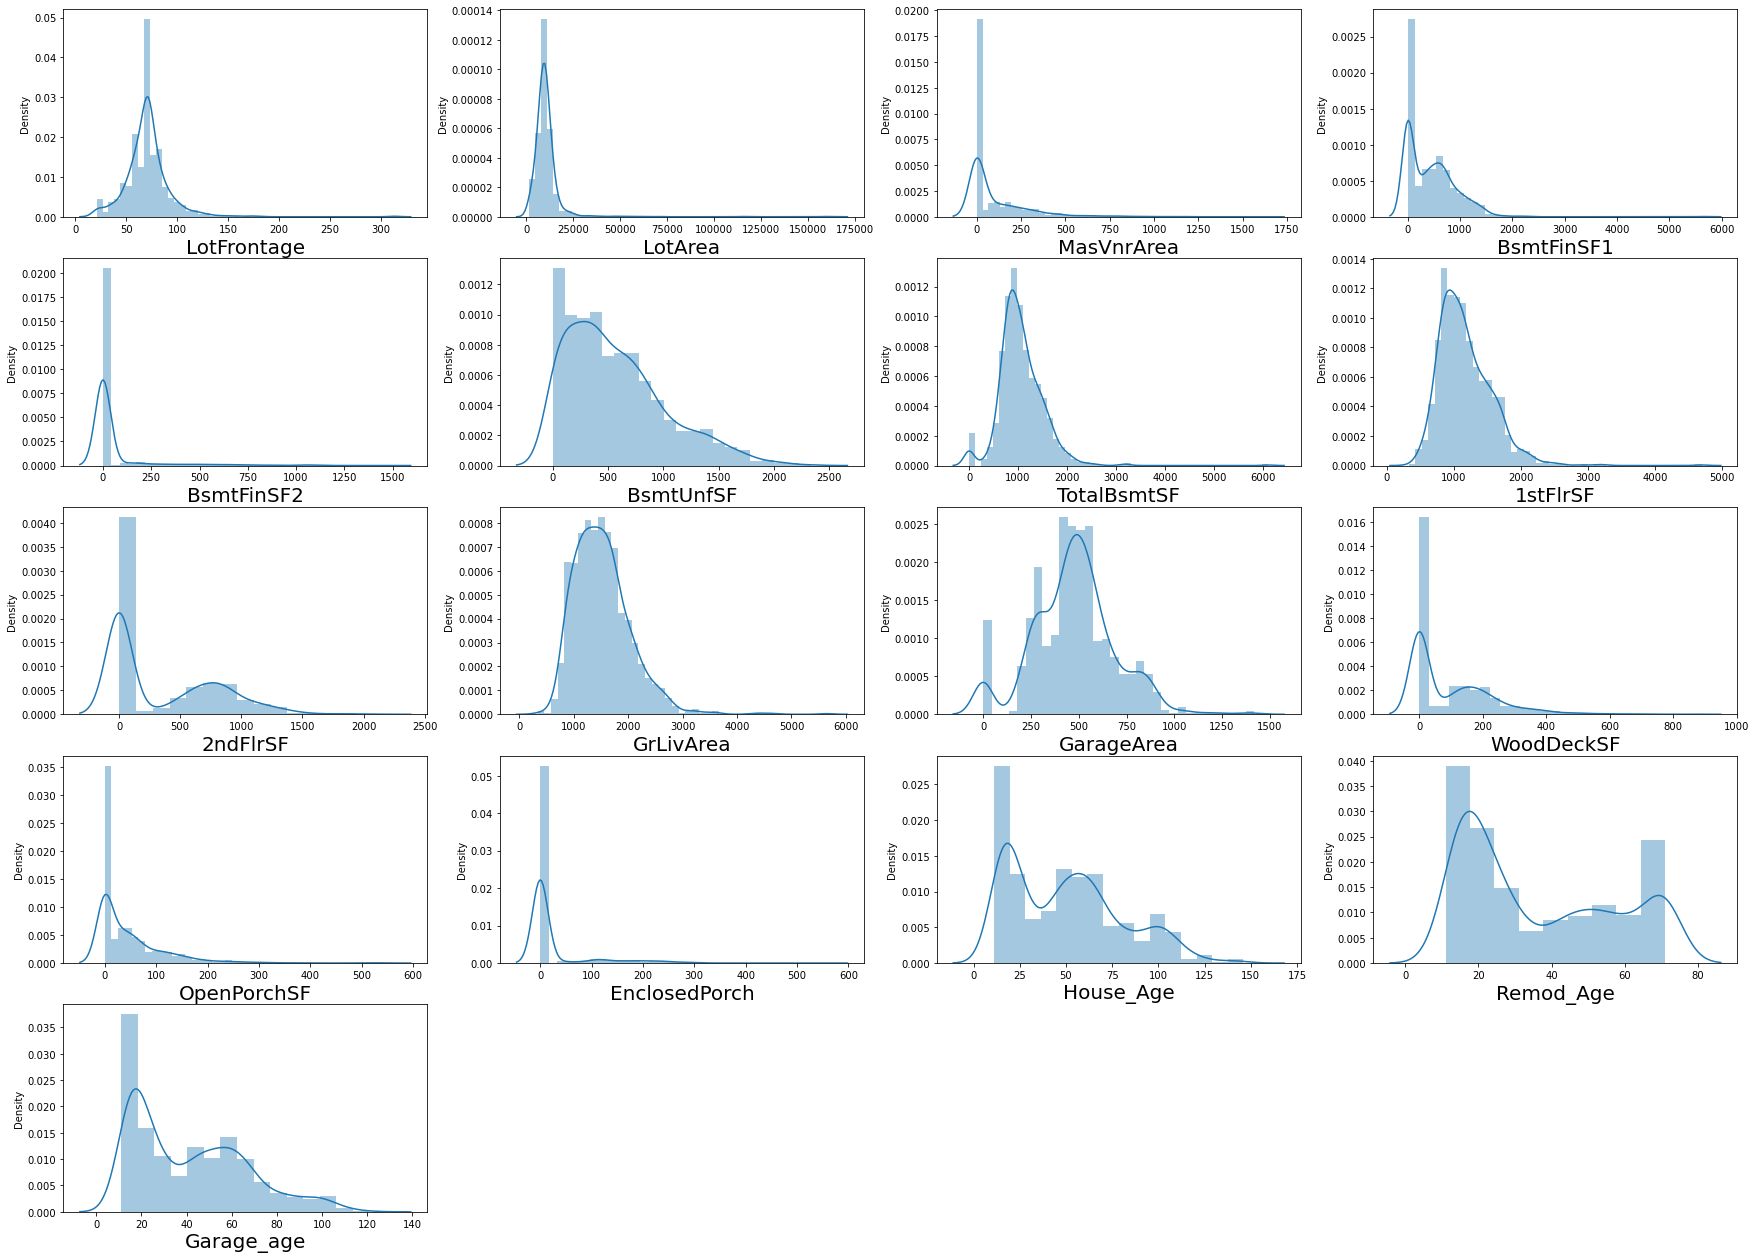

In [117]:
plt.figure(figsize=(30,45),facecolor='white')
plotnum=1
for col in train[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','House_Age','Remod_Age','Garage_age']]:
    if plotnum<=30:
        plt.subplot(10,4,plotnum)
        sea.distplot(train[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [118]:
train[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','House_Age','Remod_Age','Garage_age']].skew()

LotFrontage       2.710383
LotArea          10.659285
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
GrLivArea         1.449952
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
House_Age         0.579204
Remod_Age         0.495864
Garage_age        0.708074
dtype: float64

Data Distributions are skewed.

In [120]:
from sklearn.preprocessing import PowerTransformer

In [121]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [122]:
df4 = train[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']]

In [123]:
transformed= powtrans.fit_transform(df4)

In [124]:
type(transformed)

numpy.ndarray

In [126]:
#to convert numpy array back into dataframe:

transformed = pd.DataFrame(transformed, columns=df4.columns) 

In [127]:
transformed.skew()

LotFrontage      0.161368
LotArea          0.032509
MasVnrArea       0.439526
BsmtFinSF1      -0.404528
BsmtFinSF2       2.394737
BsmtUnfSF       -0.284390
TotalBsmtSF      0.286779
1stFlrSF        -0.002391
2ndFlrSF         0.280208
GrLivArea       -0.000054
GarageArea      -0.320370
WoodDeckSF       0.113026
OpenPorchSF     -0.002749
EnclosedPorch    2.022616
dtype: float64

In [128]:
transformed.index = train.index

In [129]:
train[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']] = transformed[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']]

In [130]:
train[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','House_Age','Remod_Age','Garage_age']].skew()

LotFrontage      0.161368
LotArea          0.032509
MasVnrArea       0.439526
BsmtFinSF1      -0.404528
BsmtFinSF2       2.394737
BsmtUnfSF       -0.284390
TotalBsmtSF      0.286779
1stFlrSF        -0.002391
2ndFlrSF         0.280208
GrLivArea       -0.000054
GarageArea      -0.320370
WoodDeckSF       0.113026
OpenPorchSF     -0.002749
EnclosedPorch    2.022616
House_Age        0.579204
Remod_Age        0.495864
Garage_age       0.708074
dtype: float64

A lot of skewness has been removed.

In [131]:
from sklearn.preprocessing import PowerTransformer

In [132]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [133]:
df4 = test[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']]

In [134]:
transformed= powtrans.fit_transform(df4)

In [135]:
type(transformed)

numpy.ndarray

In [136]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe


In [137]:
transformed.skew()

LotFrontage      0.096846
LotArea          0.003111
MasVnrArea       0.376082
BsmtFinSF1      -0.441605
BsmtFinSF2       2.570199
BsmtUnfSF       -0.232099
TotalBsmtSF     -0.037982
1stFlrSF        -0.000548
2ndFlrSF         0.284246
GrLivArea       -0.000307
GarageArea      -0.361092
WoodDeckSF       0.210102
OpenPorchSF     -0.058951
EnclosedPorch    2.165535
dtype: float64

In [138]:
transformed.index = test.index

In [139]:
test[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']] = transformed[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']]

In [140]:
test[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','House_Age','Remod_Age','Garage_age']].skew()

LotFrontage      0.096846
LotArea          0.003111
MasVnrArea       0.376082
BsmtFinSF1      -0.441605
BsmtFinSF2       2.570199
BsmtUnfSF       -0.232099
TotalBsmtSF     -0.037982
1stFlrSF        -0.000548
2ndFlrSF         0.284246
GrLivArea       -0.000307
GarageArea      -0.361092
WoodDeckSF       0.210102
OpenPorchSF     -0.058951
EnclosedPorch    2.165535
House_Age        0.755233
Remod_Age        0.535600
Garage_age       0.742835
dtype: float64

### Feature Selection

In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
X = train.drop(columns = ['SalePrice'])
y = train['SalePrice']

In [143]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

### Checking for Multicollinearity using Variance Inflation Factor

In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [145]:
vif = pd.DataFrame()

In [146]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [147]:
vif

Features       vif
0      MSSubClass  5.507317
1        MSZoning  1.382987
2     LotFrontage  2.174714
3         LotArea  2.900531
4          Street  1.131134
..            ...       ...
68       SaleType  1.121925
69  SaleCondition  1.199333
70      House_Age  8.061473
71      Remod_Age  2.933032
72     Garage_age  2.888644

[73 rows x 2 columns]

BsmtFinSF1, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageCars, GarageArea, House_Age show high multicollinearity.

### Principle Component Analysis

In [148]:
from sklearn.decomposition import PCA

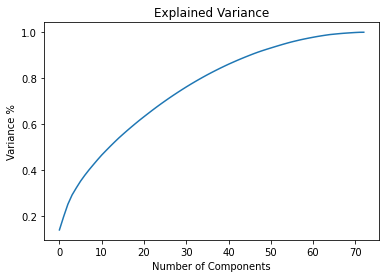

In [149]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

70 components explain around 95% variance in Data

### Selecting Kbest Features:

In [150]:
from sklearn.feature_selection import SelectKBest, f_classif

In [151]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [152]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(75,'Score'))

        Feature     Score
14  OverallQual  5.303071
65      MiscVal  3.564855
22    ExterQual  3.514221
41    GrLivArea  2.956955
25     BsmtQual  2.876879
..          ...       ...
10   Condition1  0.803848
50   Functional  0.797839
31   BsmtFinSF2  0.793233
11   Condition2  0.782965
68     SaleType  0.778011

[73 rows x 2 columns]


In [153]:
X.shape

(1168, 73)

#### Selecting best features based on their scores:

In [154]:
x_best = X.drop(columns=['SaleType','Condition2','BsmtFinSF2']).copy()

In [155]:
scaled_x_best = scaler.fit_transform(x_best)

### This is a Regression Problem since Target column ('SalePrice') has Continuous type of Data.


In [157]:
from sklearn.model_selection import train_test_split

In [158]:
from sklearn.metrics import r2_score

#### Finding the Best Random State

In [160]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9114981264926376 on random_state: 72


In [162]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state =72)

In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

In [163]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
xg = XGBRegressor()
SV= SVR()
r=Ridge()

### Training the Models

In [164]:
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)
r.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeRegressor()

All models have been trained.

### Ridge Regression Model:

In [165]:
y_r_pred = r.predict(x_test)

####  R2 Score

In [166]:
r2_score(y_test,y_r_pred)

0.8581092136367113

#### Mean Squared Error 

In [169]:
mean_squared_error(y_test,y_r_pred)

860008392.6691393

#### Root Mean Squared Error

In [170]:
np.sqrt(mean_squared_error(y_test,y_r_pred))

29325.8996907024

###  Random Forest Regression Model

In [171]:
y_rf_pred = rf.predict(x_test)

#### R2 Score

In [172]:
r2_score(y_test,y_rf_pred)

0.9155697693175471

#### Mean Squared Error

In [173]:
mean_squared_error(y_test,y_rf_pred)

511736588.70275646

#### Root Mean Squared Error

In [174]:
np.sqrt(mean_squared_error(y_test,y_rf_pred))

22621.595626806622

### XGB Regression Model 

In [175]:
y_xg_pred = xg.predict(x_test)

####  R2 Score

In [176]:
r2_score(y_test,y_xg_pred)

0.8990045700516924

#### Mean Squared Error

In [177]:
mean_squared_error(y_test,y_xg_pred)

612139234.7096407

#### Root Mean Squared Error

In [178]:
np.sqrt(mean_squared_error(y_test,y_xg_pred))

24741.447708443433

### Support Vector Regression Model

In [179]:
y_svr_pred = SV.predict(x_test)

####  R2 Score

In [180]:
r2_score(y_test,y_svr_pred)

-0.061666480005083235

#### Mean Squared Error

In [181]:
mean_squared_error(y_test,y_svr_pred)

6434822911.490364

#### Root Mean Squared Error

In [182]:
np.sqrt(mean_squared_error(y_test,y_svr_pred))

80217.34794600458

###  Decision Tree Regression Model

In [183]:
y_dt_pred = dt.predict(x_test)

####  R2 Score

In [184]:
r2_score(y_test,y_dt_pred)

0.8028338092410598

#### Mean Squared Error

In [185]:
mean_squared_error(y_test,y_dt_pred)

1195035866.3116438

#### Root Mean Squared Error

In [186]:
np.sqrt(mean_squared_error(y_test,y_dt_pred))

34569.2907985056

### Model Cross Validation

In [187]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

#### Ridge Regression

In [188]:
cross_val_score(r,scaled_x_best,y,cv=5).mean()

0.77241873730882

#### Random Forest Regression

In [189]:
cross_val_score(rf,scaled_x_best,y,cv=5).mean()

0.8450345929065464

#### XGB Regression

In [190]:
cross_val_score(xg,scaled_x_best,y,cv=5).mean()

0.8317857020177609

#### SV Regression

In [191]:
cross_val_score(SV,scaled_x_best,y,cv=5).mean()

-0.06178097265098006

#### Decision Tree Regression

In [192]:
cross_val_score(dt,scaled_x_best,y,cv=5).mean()

0.7128339377287254

### Based on  Accuracy Score comparision results with Cross Validation results, it is determined that Random Forest Regressor is the best model. It also has the lowest Root Mean Squared Error score

#### Random Forest Regressor

In [193]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],'min_samples_leaf':[1,2,5,10,20,30],'min_samples_split':[5,10,20],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [194]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [195]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10, 20, 30],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [30, 60, 80]},
             verbose=1)

In [196]:
GridCV.best_params_

{'criterion': 'mae',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 30}

In [197]:
Best_mod = RandomForestRegressor(n_estimators = 80,criterion = 'mae', max_depth= 40, max_features = 'sqrt',min_samples_leaf = 1, min_samples_split = 5)

In [198]:
Best_mod.fit(x_train,y_train)


RandomForestRegressor(criterion='mae', max_depth=40, max_features='sqrt',
                      min_samples_split=5, n_estimators=80)

In [201]:
rfpred = Best_mod.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)

90.4679659903405


##### Random Forest Regressor has an accuracy of 90.46%

#### Saving The Model

In [202]:
import joblib
joblib.dump(Best_mod,"BestHousingModel.pkl")

['BestHousingModel.pkl']

In [203]:
xtest_best = test.drop(columns=['SaleType','Condition2','BsmtFinSF2']).copy()

In [204]:
scaled_xtest_best = scaler.fit_transform(xtest_best)

#### Loading The Model:

In [205]:
mod=joblib.load("BestHousingModel.pkl")

In [206]:
print(mod.predict(scaled_xtest_best))

[328414.975   208007.14375 260270.475   165098.26875 242204.225
 100414.2625  147451.7     319044.6625  247354.43125 169295.49375
  97061.075   145606.875   123240.2375  204865.625   289762.24375
 132133.19375 120525.625   128185.3625  175326.59375 191599.49375
 157229.175   156313.9375  151789.475   111516.0125  111487.8125
 131539.95625 179292.575   150162.      165901.25    110099.5375
 147886.975   195067.39375 235907.1625  160804.375   121280.675
 179170.5     200863.61875 118218.85    161091.725   144807.5
 107274.83125 315116.90625 205390.84375 187335.94375 145831.8
 133047.5     129977.2375  105312.2375  209951.6     326192.5625
 154249.60625 220624.1125  107459.475   100970.5125  278842.225
 130784.84375 143551.35    189155.575   119945.0875  244689.16875
 115334.70625 189577.5375  134607.85625 147144.05    192031.2875
 114004.9     156279.59375 208341.20625 138438.59375 163864.4
 288939.71875 170238.4125  168666.3125  173356.3875  147324.44375
 233903.0875  306692.925   20254

In [207]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(scaled_xtest_best), 'Actual Values': y[0:292]})
Prediction_accuracy

Predictions  Actual Values
0    328414.97500         128000
1    208007.14375         268000
2    260270.47500         269790
3    165098.26875         190000
4    242204.22500         215000
..            ...            ...
287  244920.65625         178000
288  142234.66250         131000
289  150669.68750         145000
290  152538.47500          97500
291  106376.87500         307000

[292 rows x 2 columns]